In [ ]:
import pandas as pd
import numpy as np

In [ ]:
b = pd.read_csv('/content/drive/MyDrive/data_CA/master_barajas.csv')
b

,fecha,barajas_tmed,barajas_prec,barajas_tmin,barajas_tmax,barajas_dir,barajas_velmedia,barajas_racha,barajas_presMax,barajas_presMin,...,barajas_hrMax,barajas_hrMin,barajas_dioxido_nitrogeno,barajas_monoxido_nitrogeno,barajas_ozono,barajas_oxido_nitrogeno,dia_tipo,intensidad,ocupacion,carga
0,2017-01-01,0.2,0.0,-3.8,4.3,99,1.7,7.2,961.4,954.2,...,95,73,45,27,11.0,86,No_LAB,156.769704,4.503079,15.968596
1,2017-01-02,2.8,0.0,-1.1,6.6,99,1.7,3.6,955.6,953.0,...,97,70,52,37,13.0,109,LAB,226.734193,6.647023,23.390424
2,2017-01-03,5.5,0.0,-0.3,11.3,20,0.8,5.8,958.5,954.8,...,98,59,64,81,6.0,189,LAB,238.387793,7.379162,24.723798
3,2017-01-04,5.2,0.0,-1.3,11.8,22,1.9,11.7,959.8,956.6,...,100,66,67,87,4.0,200,LAB,238.496010,8.069368,25.219767
4,2017-01-05,5.3,0.0,-0.9,11.5,26,1.7,6.1,958.1,955.8,...,100,72,63,59,6.0,153,LAB,234.923786,7.814997,24.885065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,2023-12-27,4.0,0.0,-3.5,11.5,19,0.8,4.7,958.2,955.0,...,100,51,62,72,6.0,173,LAB,209.647368,8.842105,23.747368
2552,2023-12-28,2.9,0.0,-2.2,8.0,23,0.3,10.8,959.0,956.9,...,98,62,60,73,2.0,173,LAB,218.780105,10.539267,25.109948
2553,2023-12-29,4.6,0.0,1.1,8.0,3,1.4,6.7,957.8,953.6,...,98,63,56,77,1.0,174,LAB,223.585106,8.191489,25.143617
2554,2023-12-30,5.6,0.0,-1.6,12.7,99,1.7,4.7,954.9,950.8,...,99,48,53,44,6.0,120,No_LAB,214.983957,8.449198,24.219251


In [ ]:
b.columns

Index(['fecha', 'barajas_tmed', 'barajas_prec', 'barajas_tmin', 'barajas_tmax',
       'barajas_dir', 'barajas_velmedia', 'barajas_racha', 'barajas_presMax',
       'barajas_presMin', 'barajas_hrMedia', 'barajas_hrMax', 'barajas_hrMin',
       'barajas_dioxido_nitrogeno', 'barajas_monoxido_nitrogeno',
       'barajas_ozono', 'barajas_oxido_nitrogeno', 'dia_tipo', 'intensidad',
       'ocupacion', 'carga'],
      dtype='object')

In [ ]:
b.rename(columns={'intensidad':'barajas_intensidad', 'ocupacion':'barajas_ocupacion',
                  'carga': 'barajas_carga', 'barajas_hrMedia':'barajas_hrmedia',
                  'barajas_hrMax':'barajas_hrmax', 'barajas_hrMin':'barajas_hrmin',
                  'barajas_presMax':'barajas_presmax', 'barajas_presMin':'barajas_presmin'}, inplace=True)

index = ['fecha', 'dia_tipo', 'barajas_prec', 'barajas_tmed', 'barajas_tmin', 'barajas_tmax',
         'barajas_hrmedia', 'barajas_hrmin', 'barajas_hrmax', 'barajas_velmedia', 'barajas_dir',
         'barajas_racha', 'barajas_presmin', 'barajas_presmax', 'barajas_dioxido_nitrogeno',
         'barajas_monoxido_nitrogeno', 'barajas_oxido_nitrogeno', 'barajas_ozono',
         'barajas_intensidad', 'barajas_ocupacion', 'barajas_carga']

b_m = b.reindex(index, axis='columns')
b_m.head()

,fecha,dia_tipo,barajas_prec,barajas_tmed,barajas_tmin,barajas_tmax,barajas_hrmedia,barajas_hrmin,barajas_hrmax,barajas_velmedia,...,barajas_racha,barajas_presmin,barajas_presmax,barajas_dioxido_nitrogeno,barajas_monoxido_nitrogeno,barajas_oxido_nitrogeno,barajas_ozono,barajas_intensidad,barajas_ocupacion,barajas_carga
0,2017-01-01,No_LAB,0.0,0.2,-3.8,4.3,84,73,95,1.7,...,7.2,954.2,961.4,45,27,86,11.0,156.769704,4.503079,15.968596
1,2017-01-02,LAB,0.0,2.8,-1.1,6.6,86,70,97,1.7,...,3.6,953.0,955.6,52,37,109,13.0,226.734193,6.647023,23.390424
2,2017-01-03,LAB,0.0,5.5,-0.3,11.3,79,59,98,0.8,...,5.8,954.8,958.5,64,81,189,6.0,238.387793,7.379162,24.723798
3,2017-01-04,LAB,0.0,5.2,-1.3,11.8,86,66,100,1.9,...,11.7,956.6,959.8,67,87,200,4.0,238.496010,8.069368,25.219767
4,2017-01-05,LAB,0.0,5.3,-0.9,11.5,92,72,100,1.7,...,6.1,955.8,958.1,63,59,153,6.0,234.923786,7.814997,24.885065


In [ ]:
b_m.columns

Index(['fecha', 'dia_tipo', 'barajas_prec', 'barajas_tmed', 'barajas_tmin',
       'barajas_tmax', 'barajas_hrmedia', 'barajas_hrmin', 'barajas_hrmax',
       'barajas_velmedia', 'barajas_dir', 'barajas_racha', 'barajas_presmin',
       'barajas_presmax', 'barajas_dioxido_nitrogeno',
       'barajas_monoxido_nitrogeno', 'barajas_oxido_nitrogeno',
       'barajas_ozono', 'barajas_intensidad', 'barajas_ocupacion',
       'barajas_carga'],
      dtype='object')

In [ ]:
b_m.to_csv('/content/drive/MyDrive/data_CA/master_barajas_m.csv', index=False)

In [ ]:
cc = pd.read_csv('/content/drive/MyDrive/data_CA/master_cuatrocaminos.csv')
cc.drop('nombre', axis=1, inplace=True)
cc

,fecha,caminos_prec,caminos_tmed,caminos_tmin,caminos_tmax,caminos_humedia,caminos_humax,caminos_humin,caminos_dioxido_azufre,caminos_monoxido_nitrogeno,...,caminos_pm25,caminos_pm10,caminos_oxido_nitrogeno,caminos_tolueno,caminos_benceno,caminos_etilbenceno,dia_tipo,intensidad,ocupacion,carga
0,2017-01-01,0.0,4.3,-3.8,12.4,60.0,85.0,36.0,8.0,44.0,...,22.0,27.0,122.0,5.0,0.9,0.7,No_LAB,297.181492,2.740652,12.626784
1,2017-01-02,0.0,4.3,-3.8,12.4,60.0,85.0,36.0,6.0,36.0,...,20.0,26.0,109.0,5.8,0.9,0.7,LAB,423.530477,4.214254,18.266312
2,2017-01-03,0.0,4.3,-3.8,12.4,60.0,85.0,36.0,9.0,73.0,...,25.0,35.0,178.0,9.9,1.9,0.7,LAB,468.072589,4.919612,20.256892
3,2017-01-04,0.0,4.3,-3.8,12.4,60.0,85.0,36.0,10.0,103.0,...,29.0,41.0,230.0,13.3,2.6,0.7,LAB,497.737337,5.489058,21.522335
4,2017-01-05,0.0,4.3,-3.8,12.4,60.0,85.0,36.0,8.0,103.0,...,26.0,34.0,230.0,11.2,2.4,0.7,LAB,453.394880,5.081774,20.175442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,2023-12-27,0.0,4.6,-0.2,9.3,76.0,99.0,55.0,18.0,112.0,...,28.0,42.0,251.0,4.5,0.8,1.0,LAB,402.131405,4.543802,19.212810
2552,2023-12-28,0.0,4.0,0.9,7.1,78.0,95.0,67.0,24.0,95.0,...,30.0,47.0,224.0,4.0,0.6,0.8,LAB,408.239959,4.648177,19.571084
2553,2023-12-29,0.0,6.1,3.7,8.5,79.0,89.0,54.0,20.0,95.0,...,31.0,47.0,223.0,4.1,0.7,0.8,LAB,396.057622,4.385602,18.974806
2554,2023-12-30,0.0,6.2,1.8,10.7,79.0,97.0,61.0,20.0,46.0,...,23.0,30.0,134.0,2.3,0.5,0.5,No_LAB,318.879624,3.459309,15.039766


In [ ]:
cc.columns

Index(['fecha', 'caminos_prec', 'caminos_tmed', 'caminos_tmin', 'caminos_tmax',
       'caminos_humedia', 'caminos_humax', 'caminos_humin',
       'caminos_dioxido_azufre', 'caminos_monoxido_nitrogeno',
       'caminos_dioxido_nitrogeno', 'caminos_pm25', 'caminos_pm10',
       'caminos_oxido_nitrogeno', 'caminos_tolueno', 'caminos_benceno',
       'caminos_etilbenceno', 'dia_tipo', 'intensidad', 'ocupacion', 'carga'],
      dtype='object')

In [ ]:
cc.rename(columns={'intensidad':'caminos_intensidad','ocupacion':'caminos_ocupacion',
                  'carga': 'caminos_carga','caminos_humedia':'caminos_hrmedia',
                   'caminos_humax':'caminos_hrmax','caminos_humin':'caminos_hrmin'}, inplace=True)

index = ['fecha','dia_tipo', 'caminos_prec', 'caminos_tmed', 'caminos_tmin', 'caminos_tmax',
         'caminos_hrmedia', 'caminos_hrmin', 'caminos_hrmax', 'caminos_dioxido_nitrogeno',
         'caminos_monoxido_nitrogeno', 'caminos_oxido_nitrogeno', 'caminos_pm25', 'caminos_pm10',
         'caminos_dioxido_azufre', 'caminos_tolueno', 'caminos_benceno',
         'caminos_etilbenceno', 'caminos_intensidad', 'caminos_ocupacion', 'caminos_carga']

cc_m = cc.reindex(index, axis='columns')
cc_m.head()

,fecha,dia_tipo,caminos_prec,caminos_tmed,caminos_tmin,caminos_tmax,caminos_hrmedia,caminos_hrmin,caminos_hrmax,caminos_dioxido_nitrogeno,...,caminos_oxido_nitrogeno,caminos_pm25,caminos_pm10,caminos_dioxido_azufre,caminos_tolueno,caminos_benceno,caminos_etilbenceno,caminos_intensidad,caminos_ocupacion,caminos_carga
0,2017-01-01,No_LAB,0.0,4.3,-3.8,12.4,60.0,36.0,85.0,55.0,...,122.0,22.0,27.0,8.0,5.0,0.9,0.7,297.181492,2.740652,12.626784
1,2017-01-02,LAB,0.0,4.3,-3.8,12.4,60.0,36.0,85.0,54.0,...,109.0,20.0,26.0,6.0,5.8,0.9,0.7,423.530477,4.214254,18.266312
2,2017-01-03,LAB,0.0,4.3,-3.8,12.4,60.0,36.0,85.0,66.0,...,178.0,25.0,35.0,9.0,9.9,1.9,0.7,468.072589,4.919612,20.256892
3,2017-01-04,LAB,0.0,4.3,-3.8,12.4,60.0,36.0,85.0,72.0,...,230.0,29.0,41.0,10.0,13.3,2.6,0.7,497.737337,5.489058,21.522335
4,2017-01-05,LAB,0.0,4.3,-3.8,12.4,60.0,36.0,85.0,72.0,...,230.0,26.0,34.0,8.0,11.2,2.4,0.7,453.394880,5.081774,20.175442


In [ ]:
cc_m.columns

Index(['fecha', 'dia_tipo', 'caminos_prec', 'caminos_tmed', 'caminos_tmin',
       'caminos_tmax', 'caminos_hrmedia', 'caminos_hrmin', 'caminos_hrmax',
       'caminos_dioxido_nitrogeno', 'caminos_monoxido_nitrogeno',
       'caminos_oxido_nitrogeno', 'caminos_pm25', 'caminos_pm10',
       'caminos_dioxido_azufre', 'caminos_tolueno', 'caminos_benceno',
       'caminos_etilbenceno', 'caminos_intensidad', 'caminos_ocupacion',
       'caminos_carga'],
      dtype='object')

In [ ]:
cc_m.to_csv('/content/drive/MyDrive/data_CA/master_cuatrocaminos_m.csv', index=False)

In [ ]:
e = pd.read_csv('/content/drive/MyDrive/data_CA/master_eliptica.csv')
e.drop('eliptica_nombre', axis=1, inplace=True)
e

,fecha,eliptica_tmed,eliptica_prec,eliptica_tmin,eliptica_tmax,eliptica_dir,eliptica_velmedia,eliptica_racha,eliptica_sol,eliptica_presMax,...,eliptica_monoxido_carbono,eliptica_monoxido_nitrogeno,eliptica_ozono,eliptica_oxido_nitrogeno,eliptica_pm10,eliptica_pm25,dia_tipo,intensidad,ocupacion,carga
0,2017-01-01,1.4,0.0,-1.7,4.6,35.0,0.8,4.7,0.8,948.7,...,0.6,96.0,14.0,195.0,NaN,NaN,No_LAB,372.040347,5.647782,12.256059
1,2017-01-02,2.4,0.0,-2.5,7.2,7.0,1.1,5.3,0.5,943.3,...,0.6,82.0,14.0,183.0,NaN,NaN,LAB,470.232863,6.916457,14.683235
2,2017-01-03,7.0,0.0,1.0,13.1,10.0,0.3,3.6,4.0,946.4,...,0.8,159.0,9.0,323.0,NaN,NaN,LAB,495.532593,7.352559,15.445391
3,2017-01-04,7.2,0.2,1.0,13.5,25.0,2.5,7.2,8.4,947.4,...,0.7,112.0,12.0,244.0,NaN,NaN,LAB,490.722832,7.888083,16.276691
4,2017-01-05,7.2,0.1,2.9,11.4,28.0,0.8,4.7,2.4,945.8,...,0.6,79.0,12.0,191.0,NaN,NaN,LAB,480.857274,7.320297,15.525637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,2023-12-27,5.4,0.0,-0.5,11.3,8.0,0.6,"3,6",7.4,"945,7",...,0.7,115.0,NaN,226.0,38.0,27.0,LAB,442.610851,7.392163,14.070328
2552,2023-12-28,4.2,0.0,0.4,8.0,11.0,0.8,"3,6",1.2,"946,8",...,0.7,106.0,NaN,213.0,45.0,30.0,LAB,452.437417,7.582276,14.243825
2553,2023-12-29,5.8,0.0,3.0,8.6,99.0,1.1,"4,7",0.1,"945,5",...,0.8,119.0,NaN,233.0,52.0,36.0,LAB,448.369909,7.503702,14.368563
2554,2023-12-30,7.2,0.0,1.6,12.7,21.0,1.9,"6,7",8.3,"942,7",...,0.6,69.0,NaN,149.0,36.0,27.0,No_LAB,368.677090,5.912876,12.088462


In [ ]:
e.columns

Index(['fecha', 'eliptica_tmed', 'eliptica_prec', 'eliptica_tmin',
       'eliptica_tmax', 'eliptica_dir', 'eliptica_velmedia', 'eliptica_racha',
       'eliptica_sol', 'eliptica_presMax', 'eliptica_presMin',
       'eliptica_hrMedia', 'eliptica_dioxido_nitrogeno',
       'eliptica_monoxido_carbono', 'eliptica_monoxido_nitrogeno',
       'eliptica_ozono', 'eliptica_oxido_nitrogeno', 'eliptica_pm10',
       'eliptica_pm25', 'dia_tipo', 'intensidad', 'ocupacion', 'carga'],
      dtype='object')

In [ ]:
e.rename(columns={'intensidad':'eliptica_intensidad', 'ocupacion':'eliptica_ocupacion',
                  'carga':'eliptica_carga','eliptica_presMax':'eliptica_presmax',
                  'eliptica_presMin':'eliptica_presmin', 'eliptica_hrMedia':'eliptica_hrmedia'},
          inplace=True)

index = ['fecha','dia_tipo', 'eliptica_prec', 'eliptica_tmed',  'eliptica_tmin',
         'eliptica_tmax', 'eliptica_hrmedia', 'eliptica_velmedia', 'eliptica_dir',
         'eliptica_racha', 'eliptica_presmin', 'eliptica_presmax', 'eliptica_sol',
         'eliptica_dioxido_nitrogeno', 'eliptica_monoxido_nitrogeno', 'eliptica_oxido_nitrogeno',
         'eliptica_pm25', 'eliptica_pm10', 'eliptica_ozono', 'eliptica_monoxido_carbono',
         'eliptica_intensidad', 'eliptica_ocupacion', 'eliptica_carga']

e_m = e.reindex(index, axis='columns')
e_m.head()

,fecha,dia_tipo,eliptica_prec,eliptica_tmed,eliptica_tmin,eliptica_tmax,eliptica_hrmedia,eliptica_velmedia,eliptica_dir,eliptica_racha,...,eliptica_dioxido_nitrogeno,eliptica_monoxido_nitrogeno,eliptica_oxido_nitrogeno,eliptica_pm25,eliptica_pm10,eliptica_ozono,eliptica_monoxido_carbono,eliptica_intensidad,eliptica_ocupacion,eliptica_carga
0,2017-01-01,No_LAB,0.0,1.4,-1.7,4.6,83.0,0.8,35.0,4.7,...,48.0,96.0,195.0,NaN,NaN,14.0,0.6,372.040347,5.647782,12.256059
1,2017-01-02,LAB,0.0,2.4,-2.5,7.2,79.0,1.1,7.0,5.3,...,57.0,82.0,183.0,NaN,NaN,14.0,0.6,470.232863,6.916457,14.683235
2,2017-01-03,LAB,0.0,7.0,1.0,13.1,78.0,0.3,10.0,3.6,...,80.0,159.0,323.0,NaN,NaN,9.0,0.8,495.532593,7.352559,15.445391
3,2017-01-04,LAB,0.2,7.2,1.0,13.5,91.0,2.5,25.0,7.2,...,73.0,112.0,244.0,NaN,NaN,12.0,0.7,490.722832,7.888083,16.276691
4,2017-01-05,LAB,0.1,7.2,2.9,11.4,96.0,0.8,28.0,4.7,...,70.0,79.0,191.0,NaN,NaN,12.0,0.6,480.857274,7.320297,15.525637


In [ ]:
e.columns

Index(['fecha', 'eliptica_tmed', 'eliptica_prec', 'eliptica_tmin',
       'eliptica_tmax', 'eliptica_dir', 'eliptica_velmedia', 'eliptica_racha',
       'eliptica_sol', 'eliptica_presmax', 'eliptica_presmin',
       'eliptica_hrmedia', 'eliptica_dioxido_nitrogeno',
       'eliptica_monoxido_carbono', 'eliptica_monoxido_nitrogeno',
       'eliptica_ozono', 'eliptica_oxido_nitrogeno', 'eliptica_pm10',
       'eliptica_pm25', 'dia_tipo', 'eliptica_intensidad',
       'eliptica_ocupacion', 'eliptica_carga'],
      dtype='object')

In [ ]:
e_m.to_csv('/content/drive/MyDrive/data_CA/master_eliptica_m.csv', index=False)

In [ ]:
r = pd.read_csv('/content/drive/MyDrive/data_CA/master_retiro.csv')
r.drop('nombre', axis=1, inplace=True)
r

,fecha,retiro_tmed,retiro_prec,retiro_tmin,retiro_tmax,retiro_dir,retiro_velmedia,retiro_racha,retiro_presMax,retiro_presMin,...,retiro_hrMax,retiro_hrMin,retiro_dioxido_nitrogeno,retiro_monoxido_nitrogeno,retiro_ozono,retiro_oxido_nitrogeno,dia_tipo,intensidad,ocupacion,carga
0,2017-01-01,1.7,0.0,-0.6,4.0,4.0,0.0,3.3,951.8,944.8,...,90.0,72.0,41.0,18.0,10.0,68.0,No_LAB,359.090961,4.171291,15.327445
1,2017-01-02,2.7,0.0,-0.8,6.2,4.0,0.8,4.4,945.5,943.6,...,92.0,67.0,50.0,14.0,14.0,72.0,LAB,505.303522,6.085352,21.995945
2,2017-01-03,6.0,0.0,1.7,10.2,25.0,0.0,3.3,948.6,945.3,...,87.0,61.0,48.0,55.0,8.0,132.0,LAB,539.315502,6.717354,23.689413
3,2017-01-04,6.8,0.0,2.2,11.5,23.0,0.8,3.6,950.4,947.4,...,96.0,73.0,50.0,94.0,8.0,193.0,LAB,560.971783,6.907128,24.497138
4,2017-01-05,7.2,0.0,4.7,9.8,28.0,0.6,2.8,947.7,946.3,...,98.0,75.0,51.0,70.0,9.0,158.0,LAB,517.488061,6.471603,23.078692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,2023-12-27,4.6,0.0,-0.2,9.3,20.0,0.8,3.9,947.9,945.1,...,99.0,55.0,38.0,69.0,6.0,144.0,LAB,450.967866,7.267367,21.763840
2552,2023-12-28,4.0,0.0,0.9,7.1,9.0,0.6,3.9,948.9,946.7,...,95.0,67.0,43.0,67.0,2.0,145.0,LAB,457.955178,7.442095,22.174695
2553,2023-12-29,6.1,0.0,3.7,8.5,4.0,1.1,5.0,947.7,943.5,...,89.0,54.0,44.0,85.0,2.0,174.0,LAB,458.738701,7.348518,22.153854
2554,2023-12-30,6.2,0.0,1.8,10.7,23.0,0.8,5.3,944.8,940.9,...,97.0,61.0,37.0,47.0,5.0,110.0,No_LAB,380.806727,5.789176,18.333929


In [ ]:
r.columns

Index(['fecha', 'retiro_tmed', 'retiro_prec', 'retiro_tmin', 'retiro_tmax',
       'retiro_dir', 'retiro_velmedia', 'retiro_racha', 'retiro_presMax',
       'retiro_presMin', 'retiro_hrMedia', 'retiro_hrMax', 'retiro_hrMin',
       'retiro_dioxido_nitrogeno', 'retiro_monoxido_nitrogeno', 'retiro_ozono',
       'retiro_oxido_nitrogeno', 'dia_tipo', 'intensidad', 'ocupacion',
       'carga'],
      dtype='object')

In [ ]:
r.rename(columns={'intensidad':'retiro_intensidad', 'ocupacion':'retiro_ocupacion',
                  'carga':'retiro_carga','retiro_presMax':'retiro_presmax',
                  'retiro_presMin':'retiro_presmin', 'retiro_hrMedia':'retiro_hrmedia',
                  'retiro_hrMin':'retiro_hrmin', 'retiro_hrMax':'retiro_hrmax'},
         inplace=True)

index = ['fecha','dia_tipo', 'retiro_prec', 'retiro_tmed', 'retiro_tmin', 'retiro_tmax',
         'retiro_hrmedia', 'retiro_hrmin', 'retiro_hrmax', 'retiro_velmedia', 'retiro_dir',
         'retiro_racha', 'retiro_presmin', 'retiro_presmax', 'retiro_dioxido_nitrogeno',
         'retiro_monoxido_nitrogeno', 'retiro_oxido_nitrogeno', 'retiro_ozono',
         'retiro_intensidad', 'retiro_ocupacion', 'retiro_carga']

r_m = r.reindex(index, axis='columns')
r_m.head()

,fecha,dia_tipo,retiro_prec,retiro_tmed,retiro_tmin,retiro_tmax,retiro_hrmedia,retiro_hrmin,retiro_hrmax,retiro_velmedia,...,retiro_racha,retiro_presmin,retiro_presmax,retiro_dioxido_nitrogeno,retiro_monoxido_nitrogeno,retiro_oxido_nitrogeno,retiro_ozono,retiro_intensidad,retiro_ocupacion,retiro_carga
0,2017-01-01,No_LAB,0.0,1.7,-0.6,4.0,78.0,72.0,90.0,0.0,...,3.3,944.8,951.8,41.0,18.0,68.0,10.0,359.090961,4.171291,15.327445
1,2017-01-02,LAB,0.0,2.7,-0.8,6.2,76.0,67.0,92.0,0.8,...,4.4,943.6,945.5,50.0,14.0,72.0,14.0,505.303522,6.085352,21.995945
2,2017-01-03,LAB,0.0,6.0,1.7,10.2,74.0,61.0,87.0,0.0,...,3.3,945.3,948.6,48.0,55.0,132.0,8.0,539.315502,6.717354,23.689413
3,2017-01-04,LAB,0.0,6.8,2.2,11.5,85.0,73.0,96.0,0.8,...,3.6,947.4,950.4,50.0,94.0,193.0,8.0,560.971783,6.907128,24.497138
4,2017-01-05,LAB,0.0,7.2,4.7,9.8,90.0,75.0,98.0,0.6,...,2.8,946.3,947.7,51.0,70.0,158.0,9.0,517.488061,6.471603,23.078692


In [ ]:
r_m.columns

Index(['fecha', 'dia_tipo', 'retiro_prec', 'retiro_tmed', 'retiro_tmin',
       'retiro_tmax', 'retiro_hrmedia', 'retiro_hrmin', 'retiro_hrmax',
       'retiro_velmedia', 'retiro_dir', 'retiro_racha', 'retiro_presmin',
       'retiro_presmax', 'retiro_dioxido_nitrogeno',
       'retiro_monoxido_nitrogeno', 'retiro_oxido_nitrogeno', 'retiro_ozono',
       'retiro_intensidad', 'retiro_ocupacion', 'retiro_carga'],
      dtype='object')

In [ ]:
r_m.to_csv('/content/drive/MyDrive/data_CA/master_retiro_m.csv', index=False)

In [ ]:
# Unir horizontal
bb = pd.read_csv('/content/drive/MyDrive/data_CA/master_barajas_m.csv')
cc = pd.read_csv('/content/drive/MyDrive/data_CA/master_cuatrocaminos_m.csv')
ee = pd.read_csv('/content/drive/MyDrive/data_CA/master_eliptica_m.csv')
rr = pd.read_csv('/content/drive/MyDrive/data_CA/master_retiro_m.csv')

df = bb.merge(cc, on=['fecha','dia_tipo'], how='left')
df1 = df.merge(ee, on=['fecha','dia_tipo'], how='left')
df2 = df1.merge(rr, on=['fecha','dia_tipo'], how='left')

df2.columns

Index(['fecha', 'dia_tipo', 'barajas_prec', 'barajas_tmed', 'barajas_tmin',
       'barajas_tmax', 'barajas_hrmedia', 'barajas_hrmin', 'barajas_hrmax',
       'barajas_velmedia', 'barajas_dir', 'barajas_racha', 'barajas_presmin',
       'barajas_presmax', 'barajas_dioxido_nitrogeno',
       'barajas_monoxido_nitrogeno', 'barajas_oxido_nitrogeno',
       'barajas_ozono', 'barajas_intensidad', 'barajas_ocupacion',
       'barajas_carga', 'caminos_prec', 'caminos_tmed', 'caminos_tmin',
       'caminos_tmax', 'caminos_hrmedia', 'caminos_hrmin', 'caminos_hrmax',
       'caminos_dioxido_nitrogeno', 'caminos_monoxido_nitrogeno',
       'caminos_oxido_nitrogeno', 'caminos_pm25', 'caminos_pm10',
       'caminos_dioxido_azufre', 'caminos_tolueno', 'caminos_benceno',
       'caminos_etilbenceno', 'caminos_intensidad', 'caminos_ocupacion',
       'caminos_carga', 'eliptica_prec', 'eliptica_tmed', 'eliptica_tmin',
       'eliptica_tmax', 'eliptica_hrmedia', 'eliptica_velmedia',
       'eliptica_dir

In [ ]:
df2

,fecha,dia_tipo,barajas_prec,barajas_tmed,barajas_tmin,barajas_tmax,barajas_hrmedia,barajas_hrmin,barajas_hrmax,barajas_velmedia,...,retiro_racha,retiro_presmin,retiro_presmax,retiro_dioxido_nitrogeno,retiro_monoxido_nitrogeno,retiro_oxido_nitrogeno,retiro_ozono,retiro_intensidad,retiro_ocupacion,retiro_carga
0,2017-01-01,No_LAB,0.0,0.2,-3.8,4.3,84,73,95,1.7,...,3.3,944.8,951.8,41.0,18.0,68.0,10.0,359.090961,4.171291,15.327445
1,2017-01-02,LAB,0.0,2.8,-1.1,6.6,86,70,97,1.7,...,4.4,943.6,945.5,50.0,14.0,72.0,14.0,505.303522,6.085352,21.995945
2,2017-01-03,LAB,0.0,5.5,-0.3,11.3,79,59,98,0.8,...,3.3,945.3,948.6,48.0,55.0,132.0,8.0,539.315502,6.717354,23.689413
3,2017-01-04,LAB,0.0,5.2,-1.3,11.8,86,66,100,1.9,...,3.6,947.4,950.4,50.0,94.0,193.0,8.0,560.971783,6.907128,24.497138
4,2017-01-05,LAB,0.0,5.3,-0.9,11.5,92,72,100,1.7,...,2.8,946.3,947.7,51.0,70.0,158.0,9.0,517.488061,6.471603,23.078692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,2023-12-27,LAB,0.0,4.0,-3.5,11.5,77,51,100,0.8,...,3.9,945.1,947.9,38.0,69.0,144.0,6.0,450.967866,7.267367,21.763840
2552,2023-12-28,LAB,0.0,2.9,-2.2,8.0,82,62,98,0.3,...,3.9,946.7,948.9,43.0,67.0,145.0,2.0,457.955178,7.442095,22.174695
2553,2023-12-29,LAB,0.0,4.6,1.1,8.0,83,63,98,1.4,...,5.0,943.5,947.7,44.0,85.0,174.0,2.0,458.738701,7.348518,22.153854
2554,2023-12-30,No_LAB,0.0,5.6,-1.6,12.7,74,48,99,1.7,...,5.3,940.9,944.8,37.0,47.0,110.0,5.0,380.806727,5.789176,18.333929


In [ ]:
df2.columns[df2.isnull().any()]

Index(['eliptica_pm25', 'eliptica_pm10', 'eliptica_ozono'], dtype='object')

In [ ]:
df2[df2.columns[df2.isnull().any()]].isnull().sum()

eliptica_pm25      730
eliptica_pm10      730
eliptica_ozono    1095
dtype: int64

In [ ]:
df2.to_csv('/content/drive/MyDrive/data_CA/master_h.csv', index=False)

In [ ]:
df2[df2.eliptica_pm25.isnull()] # 2017-2018

,fecha,dia_tipo,barajas_prec,barajas_tmed,barajas_tmin,barajas_tmax,barajas_hrmedia,barajas_hrmin,barajas_hrmax,barajas_velmedia,...,retiro_racha,retiro_presmin,retiro_presmax,retiro_dioxido_nitrogeno,retiro_monoxido_nitrogeno,retiro_oxido_nitrogeno,retiro_ozono,retiro_intensidad,retiro_ocupacion,retiro_carga
0,2017-01-01,No_LAB,0.0,0.2,-3.8,4.3,84,73,95,1.7,...,3.3,944.8,951.8,41.0,18.0,68.0,10.0,359.090961,4.171291,15.327445
1,2017-01-02,LAB,0.0,2.8,-1.1,6.6,86,70,97,1.7,...,4.4,943.6,945.5,50.0,14.0,72.0,14.0,505.303522,6.085352,21.995945
2,2017-01-03,LAB,0.0,5.5,-0.3,11.3,79,59,98,0.8,...,3.3,945.3,948.6,48.0,55.0,132.0,8.0,539.315502,6.717354,23.689413
3,2017-01-04,LAB,0.0,5.2,-1.3,11.8,86,66,100,1.9,...,3.6,947.4,950.4,50.0,94.0,193.0,8.0,560.971783,6.907128,24.497138
4,2017-01-05,LAB,0.0,5.3,-0.9,11.5,92,72,100,1.7,...,2.8,946.3,947.7,51.0,70.0,158.0,9.0,517.488061,6.471603,23.078692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2018-12-27,LAB,0.0,5.2,-1.5,11.9,82,60,98,1.1,...,3.3,947.9,950.0,50.0,67.0,153.0,3.0,574.934154,6.817891,25.255203
726,2018-12-28,LAB,0.0,6.2,-1.7,14.0,76,48,98,1.7,...,5.8,948.5,950.8,46.0,61.0,140.0,11.0,575.756521,6.554782,25.039169
727,2018-12-29,No_LAB,0.0,6.4,-0.9,13.8,76,49,97,1.7,...,7.8,949.8,950.9,31.0,5.0,39.0,25.0,464.827960,5.107987,20.295904
728,2018-12-30,No_LAB,0.0,6.3,-2.2,14.8,62,41,96,1.7,...,7.5,949.6,952.3,38.0,19.0,67.0,27.0,425.591361,4.641139,18.721637


In [ ]:
df2[df2.eliptica_pm10.isnull()] # 2017-2018

,fecha,dia_tipo,barajas_prec,barajas_tmed,barajas_tmin,barajas_tmax,barajas_hrmedia,barajas_hrmin,barajas_hrmax,barajas_velmedia,...,retiro_racha,retiro_presmin,retiro_presmax,retiro_dioxido_nitrogeno,retiro_monoxido_nitrogeno,retiro_oxido_nitrogeno,retiro_ozono,retiro_intensidad,retiro_ocupacion,retiro_carga
0,2017-01-01,No_LAB,0.0,0.2,-3.8,4.3,84,73,95,1.7,...,3.3,944.8,951.8,41.0,18.0,68.0,10.0,359.090961,4.171291,15.327445
1,2017-01-02,LAB,0.0,2.8,-1.1,6.6,86,70,97,1.7,...,4.4,943.6,945.5,50.0,14.0,72.0,14.0,505.303522,6.085352,21.995945
2,2017-01-03,LAB,0.0,5.5,-0.3,11.3,79,59,98,0.8,...,3.3,945.3,948.6,48.0,55.0,132.0,8.0,539.315502,6.717354,23.689413
3,2017-01-04,LAB,0.0,5.2,-1.3,11.8,86,66,100,1.9,...,3.6,947.4,950.4,50.0,94.0,193.0,8.0,560.971783,6.907128,24.497138
4,2017-01-05,LAB,0.0,5.3,-0.9,11.5,92,72,100,1.7,...,2.8,946.3,947.7,51.0,70.0,158.0,9.0,517.488061,6.471603,23.078692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2018-12-27,LAB,0.0,5.2,-1.5,11.9,82,60,98,1.1,...,3.3,947.9,950.0,50.0,67.0,153.0,3.0,574.934154,6.817891,25.255203
726,2018-12-28,LAB,0.0,6.2,-1.7,14.0,76,48,98,1.7,...,5.8,948.5,950.8,46.0,61.0,140.0,11.0,575.756521,6.554782,25.039169
727,2018-12-29,No_LAB,0.0,6.4,-0.9,13.8,76,49,97,1.7,...,7.8,949.8,950.9,31.0,5.0,39.0,25.0,464.827960,5.107987,20.295904
728,2018-12-30,No_LAB,0.0,6.3,-2.2,14.8,62,41,96,1.7,...,7.5,949.6,952.3,38.0,19.0,67.0,27.0,425.591361,4.641139,18.721637


In [ ]:
df2[df2.eliptica_ozono.isnull()] # 2021-2023

,fecha,dia_tipo,barajas_prec,barajas_tmed,barajas_tmin,barajas_tmax,barajas_hrmedia,barajas_hrmin,barajas_hrmax,barajas_velmedia,...,retiro_racha,retiro_presmin,retiro_presmax,retiro_dioxido_nitrogeno,retiro_monoxido_nitrogeno,retiro_oxido_nitrogeno,retiro_ozono,retiro_intensidad,retiro_ocupacion,retiro_carga
1461,2021-01-01,No_LAB,0.2,3.6,0.0,7.3,70,50,98,4.7,...,3.3,931.5,933.9,10.0,1.0,12.0,61.0,248.050256,2.653806,10.757992
1462,2021-01-02,No_LAB,0.0,1.2,-3.3,5.7,66,44,92,2.2,...,3.3,934.0,937.7,19.0,2.0,21.0,53.0,350.310435,4.072448,15.596161
1463,2021-01-03,No_LAB,0.0,1.8,-5.0,8.7,66,40,88,1.9,...,5.0,935.3,938.5,28.0,3.0,33.0,36.0,322.138978,3.711456,14.363939
1464,2021-01-04,LAB,0.0,2.4,-2.4,7.3,57,40,92,4.4,...,9.4,932.0,935.1,24.0,1.0,27.0,46.0,538.369217,6.418433,23.482414
1465,2021-01-05,LAB,0.0,0.2,-6.3,6.7,67,40,94,1.4,...,5.3,933.1,935.5,38.0,29.0,83.0,24.0,482.528546,5.821633,21.309829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,2023-12-27,LAB,0.0,4.0,-3.5,11.5,77,51,100,0.8,...,3.9,945.1,947.9,38.0,69.0,144.0,6.0,450.967866,7.267367,21.763840
2552,2023-12-28,LAB,0.0,2.9,-2.2,8.0,82,62,98,0.3,...,3.9,946.7,948.9,43.0,67.0,145.0,2.0,457.955178,7.442095,22.174695
2553,2023-12-29,LAB,0.0,4.6,1.1,8.0,83,63,98,1.4,...,5.0,943.5,947.7,44.0,85.0,174.0,2.0,458.738701,7.348518,22.153854
2554,2023-12-30,No_LAB,0.0,5.6,-1.6,12.7,74,48,99,1.7,...,5.3,940.9,944.8,37.0,47.0,110.0,5.0,380.806727,5.789176,18.333929


Rellenar eliptica_pm25 con la media de  los valores del mismo dia en el resto de los años.

In [ ]:
df2.insert(1, 'date', pd.to_datetime(df2.fecha).dt.strftime('%m %d'))
values = df2[df2.eliptica_pm25.notnull()].groupby('date', as_index=False).eliptica_pm25.mean()
values

,date,eliptica_pm25
0,01 01,21.2
1,01 02,17.6
2,01 03,20.2
3,01 04,15.2
4,01 05,15.0
...,...,...
361,12 27,15.4
362,12 28,16.0
363,12 29,16.2
364,12 30,15.0


In [ ]:
# values[values.date == '02 29'].index #59
values.drop(59, axis=0, inplace=True)
values.drop('date', axis=1, inplace=True)
values

,eliptica_pm25
0,21.2
1,17.6
2,20.2
3,15.2
4,15.0
...,...
361,15.4
362,16.0
363,16.2
364,15.0


In [ ]:
vals = pd.concat([values,values], ignore_index=True)
vals.eliptica_pm25[540]

11.6

In [ ]:
for i in range(730):
  df2.loc[i,'eliptica_pm25'] = vals.eliptica_pm25[i]
df2.eliptica_pm25

0       21.2
1       17.6
2       20.2
3       15.2
4       15.0
        ... 
2551    27.0
2552    30.0
2553    36.0
2554    27.0
2555    13.0
Name: eliptica_pm25, Length: 2556, dtype: float64

Rellenar eliptica_pm10 con la media de  los valores del mismo dia en el resto de los años.

In [ ]:
values = df2[df2.eliptica_pm10.notnull()].groupby('date', as_index=False).eliptica_pm10.mean()
values.drop(59, axis=0, inplace=True)
values.drop('date', axis=1, inplace=True)
vals = pd.concat([values,values], ignore_index=True)
vals.eliptica_pm10[540]

20.4

In [ ]:
for i in range(730):
  df2.loc[i,'eliptica_pm10'] = vals.eliptica_pm10[i]
df2.eliptica_pm10

0       27.2
1       25.6
2       28.0
3       23.2
4       23.0
        ... 
2551    38.0
2552    45.0
2553    52.0
2554    36.0
2555    17.0
Name: eliptica_pm10, Length: 2556, dtype: float64

In [ ]:
df2[df2.columns[df2.isnull().any()]].isnull().sum()

eliptica_ozono    1095
dtype: int64

In [ ]:
df2.drop('date', axis=1, inplace=True)
df2.head()

,fecha,dia_tipo,barajas_prec,barajas_tmed,barajas_tmin,barajas_tmax,barajas_hrmedia,barajas_hrmin,barajas_hrmax,barajas_velmedia,...,retiro_racha,retiro_presmin,retiro_presmax,retiro_dioxido_nitrogeno,retiro_monoxido_nitrogeno,retiro_oxido_nitrogeno,retiro_ozono,retiro_intensidad,retiro_ocupacion,retiro_carga
0,2017-01-01,No_LAB,0.0,0.2,-3.8,4.3,84,73,95,1.7,...,3.3,944.8,951.8,41.0,18.0,68.0,10.0,359.090961,4.171291,15.327445
1,2017-01-02,LAB,0.0,2.8,-1.1,6.6,86,70,97,1.7,...,4.4,943.6,945.5,50.0,14.0,72.0,14.0,505.303522,6.085352,21.995945
2,2017-01-03,LAB,0.0,5.5,-0.3,11.3,79,59,98,0.8,...,3.3,945.3,948.6,48.0,55.0,132.0,8.0,539.315502,6.717354,23.689413
3,2017-01-04,LAB,0.0,5.2,-1.3,11.8,86,66,100,1.9,...,3.6,947.4,950.4,50.0,94.0,193.0,8.0,560.971783,6.907128,24.497138
4,2017-01-05,LAB,0.0,5.3,-0.9,11.5,92,72,100,1.7,...,2.8,946.3,947.7,51.0,70.0,158.0,9.0,517.488061,6.471603,23.078692


In [ ]:
df2.to_csv('/content/drive/MyDrive/data_CA/master_h_fill.csv', index=False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_CA/master_h_fill.csv')
df.columns

Index(['fecha', 'dia_tipo', 'barajas_prec', 'barajas_tmed', 'barajas_tmin',
       'barajas_tmax', 'barajas_hrmedia', 'barajas_hrmin', 'barajas_hrmax',
       'barajas_velmedia', 'barajas_dir', 'barajas_racha', 'barajas_presmin',
       'barajas_presmax', 'barajas_dioxido_nitrogeno',
       'barajas_monoxido_nitrogeno', 'barajas_oxido_nitrogeno',
       'barajas_ozono', 'barajas_intensidad', 'barajas_ocupacion',
       'barajas_carga', 'caminos_prec', 'caminos_tmed', 'caminos_tmin',
       'caminos_tmax', 'caminos_hrmedia', 'caminos_hrmin', 'caminos_hrmax',
       'caminos_dioxido_nitrogeno', 'caminos_monoxido_nitrogeno',
       'caminos_oxido_nitrogeno', 'caminos_pm25', 'caminos_pm10',
       'caminos_dioxido_azufre', 'caminos_tolueno', 'caminos_benceno',
       'caminos_etilbenceno', 'caminos_intensidad', 'caminos_ocupacion',
       'caminos_carga', 'eliptica_prec', 'eliptica_tmed', 'eliptica_tmin',
       'eliptica_tmax', 'eliptica_hrmedia', 'eliptica_velmedia',
       'eliptica_dir

In [ ]:
columns = ['barajas_prec', 'barajas_tmed', 'barajas_tmin', 'barajas_tmax', 'barajas_hrmedia', 'barajas_hrmin', 'barajas_hrmax',
           'barajas_velmedia', 'barajas_dir', 'barajas_racha', 'barajas_presmin', 'barajas_presmax', 'barajas_dioxido_nitrogeno',
           'barajas_monoxido_nitrogeno', 'barajas_oxido_nitrogeno', 'barajas_ozono', 'barajas_intensidad', 'barajas_ocupacion',
           'barajas_carga', 'caminos_prec', 'caminos_tmed', 'caminos_tmin', 'caminos_tmax', 'caminos_hrmedia', 'caminos_hrmin', 'caminos_hrmax',
           'caminos_dioxido_nitrogeno', 'caminos_monoxido_nitrogeno', 'caminos_oxido_nitrogeno', 'caminos_pm25', 'caminos_pm10',
           'caminos_dioxido_azufre', 'caminos_tolueno', 'caminos_benceno', 'caminos_etilbenceno', 'caminos_intensidad', 'caminos_ocupacion',
           'caminos_carga', 'retiro_prec', 'retiro_tmed', 'retiro_tmin', 'retiro_tmax', 'retiro_hrmedia', 'retiro_hrmin', 'retiro_hrmax',
           'retiro_velmedia', 'retiro_dir', 'retiro_racha', 'retiro_presmin', 'retiro_presmax', 'retiro_dioxido_nitrogeno',
           'retiro_monoxido_nitrogeno', 'retiro_oxido_nitrogeno', 'retiro_ozono', 'retiro_intensidad', 'retiro_ocupacion', 'retiro_carga']

In [ ]:
df2.drop(columns, axis=1, inplace=True)
df2.columns

Index(['fecha', 'dia_tipo', 'eliptica_prec', 'eliptica_tmed', 'eliptica_tmin',
       'eliptica_tmax', 'eliptica_hrmedia', 'eliptica_velmedia',
       'eliptica_dir', 'eliptica_racha', 'eliptica_presmin',
       'eliptica_presmax', 'eliptica_sol', 'eliptica_dioxido_nitrogeno',
       'eliptica_monoxido_nitrogeno', 'eliptica_oxido_nitrogeno',
       'eliptica_pm25', 'eliptica_pm10', 'eliptica_ozono',
       'eliptica_monoxido_carbono', 'eliptica_intensidad',
       'eliptica_ocupacion', 'eliptica_carga'],
      dtype='object')

In [ ]:
df2.to_csv('/content/drive/MyDrive/data_CA/master_eliptica_m_fill.csv', index=False)

In [ ]:
dm = pd.read_csv('/content/drive/MyDrive/data_CA/master_h_fill.csv')

In [ ]:
dm.head()

,fecha,dia_tipo,barajas_prec,barajas_tmed,barajas_tmin,barajas_tmax,barajas_hrmedia,barajas_hrmin,barajas_hrmax,barajas_velmedia,...,retiro_racha,retiro_presmin,retiro_presmax,retiro_dioxido_nitrogeno,retiro_monoxido_nitrogeno,retiro_oxido_nitrogeno,retiro_ozono,retiro_intensidad,retiro_ocupacion,retiro_carga
0,2017-01-01,No_LAB,0.0,0.2,-3.8,4.3,84,73,95,1.7,...,3.3,944.8,951.8,41.0,18.0,68.0,10.0,359.090961,4.171291,15.327445
1,2017-01-02,LAB,0.0,2.8,-1.1,6.6,86,70,97,1.7,...,4.4,943.6,945.5,50.0,14.0,72.0,14.0,505.303522,6.085352,21.995945
2,2017-01-03,LAB,0.0,5.5,-0.3,11.3,79,59,98,0.8,...,3.3,945.3,948.6,48.0,55.0,132.0,8.0,539.315502,6.717354,23.689413
3,2017-01-04,LAB,0.0,5.2,-1.3,11.8,86,66,100,1.9,...,3.6,947.4,950.4,50.0,94.0,193.0,8.0,560.971783,6.907128,24.497138
4,2017-01-05,LAB,0.0,5.3,-0.9,11.5,92,72,100,1.7,...,2.8,946.3,947.7,51.0,70.0,158.0,9.0,517.488061,6.471603,23.078692


In [ ]:
dm.insert(1, 'año', pd.to_datetime(dm.fecha).dt.strftime('%Y'))
dm.head()

,fecha,año,dia_tipo,barajas_prec,barajas_tmed,barajas_tmin,barajas_tmax,barajas_hrmedia,barajas_hrmin,barajas_hrmax,...,retiro_racha,retiro_presmin,retiro_presmax,retiro_dioxido_nitrogeno,retiro_monoxido_nitrogeno,retiro_oxido_nitrogeno,retiro_ozono,retiro_intensidad,retiro_ocupacion,retiro_carga
0,2017-01-01,2017,No_LAB,0.0,0.2,-3.8,4.3,84,73,95,...,3.3,944.8,951.8,41.0,18.0,68.0,10.0,359.090961,4.171291,15.327445
1,2017-01-02,2017,LAB,0.0,2.8,-1.1,6.6,86,70,97,...,4.4,943.6,945.5,50.0,14.0,72.0,14.0,505.303522,6.085352,21.995945
2,2017-01-03,2017,LAB,0.0,5.5,-0.3,11.3,79,59,98,...,3.3,945.3,948.6,48.0,55.0,132.0,8.0,539.315502,6.717354,23.689413
3,2017-01-04,2017,LAB,0.0,5.2,-1.3,11.8,86,66,100,...,3.6,947.4,950.4,50.0,94.0,193.0,8.0,560.971783,6.907128,24.497138
4,2017-01-05,2017,LAB,0.0,5.3,-0.9,11.5,92,72,100,...,2.8,946.3,947.7,51.0,70.0,158.0,9.0,517.488061,6.471603,23.078692


In [ ]:
dm.insert(2, 'mes', pd.to_datetime(dm.fecha).dt.month)
dm.head()

,fecha,año,mes,dia_tipo,barajas_prec,barajas_tmed,barajas_tmin,barajas_tmax,barajas_hrmedia,barajas_hrmin,...,retiro_racha,retiro_presmin,retiro_presmax,retiro_dioxido_nitrogeno,retiro_monoxido_nitrogeno,retiro_oxido_nitrogeno,retiro_ozono,retiro_intensidad,retiro_ocupacion,retiro_carga
0,2017-01-01,2017,1,No_LAB,0.0,0.2,-3.8,4.3,84,73,...,3.3,944.8,951.8,41.0,18.0,68.0,10.0,359.090961,4.171291,15.327445
1,2017-01-02,2017,1,LAB,0.0,2.8,-1.1,6.6,86,70,...,4.4,943.6,945.5,50.0,14.0,72.0,14.0,505.303522,6.085352,21.995945
2,2017-01-03,2017,1,LAB,0.0,5.5,-0.3,11.3,79,59,...,3.3,945.3,948.6,48.0,55.0,132.0,8.0,539.315502,6.717354,23.689413
3,2017-01-04,2017,1,LAB,0.0,5.2,-1.3,11.8,86,66,...,3.6,947.4,950.4,50.0,94.0,193.0,8.0,560.971783,6.907128,24.497138
4,2017-01-05,2017,1,LAB,0.0,5.3,-0.9,11.5,92,72,...,2.8,946.3,947.7,51.0,70.0,158.0,9.0,517.488061,6.471603,23.078692


In [ ]:
dm.insert(2, 'dia_año', pd.to_datetime(dm.fecha).dt.dayofyear)
dm.head()

,fecha,año,dia_año,mes,dia_tipo,barajas_prec,barajas_tmed,barajas_tmin,barajas_tmax,barajas_hrmedia,...,retiro_racha,retiro_presmin,retiro_presmax,retiro_dioxido_nitrogeno,retiro_monoxido_nitrogeno,retiro_oxido_nitrogeno,retiro_ozono,retiro_intensidad,retiro_ocupacion,retiro_carga
0,2017-01-01,2017,1,1,No_LAB,0.0,0.2,-3.8,4.3,84,...,3.3,944.8,951.8,41.0,18.0,68.0,10.0,359.090961,4.171291,15.327445
1,2017-01-02,2017,2,1,LAB,0.0,2.8,-1.1,6.6,86,...,4.4,943.6,945.5,50.0,14.0,72.0,14.0,505.303522,6.085352,21.995945
2,2017-01-03,2017,3,1,LAB,0.0,5.5,-0.3,11.3,79,...,3.3,945.3,948.6,48.0,55.0,132.0,8.0,539.315502,6.717354,23.689413
3,2017-01-04,2017,4,1,LAB,0.0,5.2,-1.3,11.8,86,...,3.6,947.4,950.4,50.0,94.0,193.0,8.0,560.971783,6.907128,24.497138
4,2017-01-05,2017,5,1,LAB,0.0,5.3,-0.9,11.5,92,...,2.8,946.3,947.7,51.0,70.0,158.0,9.0,517.488061,6.471603,23.078692


In [ ]:
dm.insert(4, 'dia_mes', pd.to_datetime(dm.fecha).dt.day)
dm.head()

,fecha,año,dia_año,mes,dia_mes,dia_tipo,barajas_prec,barajas_tmed,barajas_tmin,barajas_tmax,...,retiro_racha,retiro_presmin,retiro_presmax,retiro_dioxido_nitrogeno,retiro_monoxido_nitrogeno,retiro_oxido_nitrogeno,retiro_ozono,retiro_intensidad,retiro_ocupacion,retiro_carga
0,2017-01-01,2017,1,1,1,No_LAB,0.0,0.2,-3.8,4.3,...,3.3,944.8,951.8,41.0,18.0,68.0,10.0,359.090961,4.171291,15.327445
1,2017-01-02,2017,2,1,2,LAB,0.0,2.8,-1.1,6.6,...,4.4,943.6,945.5,50.0,14.0,72.0,14.0,505.303522,6.085352,21.995945
2,2017-01-03,2017,3,1,3,LAB,0.0,5.5,-0.3,11.3,...,3.3,945.3,948.6,48.0,55.0,132.0,8.0,539.315502,6.717354,23.689413
3,2017-01-04,2017,4,1,4,LAB,0.0,5.2,-1.3,11.8,...,3.6,947.4,950.4,50.0,94.0,193.0,8.0,560.971783,6.907128,24.497138
4,2017-01-05,2017,5,1,5,LAB,0.0,5.3,-0.9,11.5,...,2.8,946.3,947.7,51.0,70.0,158.0,9.0,517.488061,6.471603,23.078692


In [ ]:
dm.to_csv('/content/drive/MyDrive/data_CA/master_h_fill_m.csv', index=False)

In [ ]:
dm = pd.read_csv('/content/drive/MyDrive/data_CA/master_h_fill_m.csv')

In [ ]:
dm.columns

Index(['fecha', 'año', 'dia_año', 'mes', 'dia_mes', 'dia_tipo', 'barajas_prec',
       'barajas_tmed', 'barajas_tmin', 'barajas_tmax', 'barajas_hrmedia',
       'barajas_hrmin', 'barajas_hrmax', 'barajas_velmedia', 'barajas_dir',
       'barajas_racha', 'barajas_presmin', 'barajas_presmax',
       'barajas_dioxido_nitrogeno', 'barajas_monoxido_nitrogeno',
       'barajas_oxido_nitrogeno', 'barajas_ozono', 'barajas_intensidad',
       'barajas_ocupacion', 'barajas_carga', 'caminos_prec', 'caminos_tmed',
       'caminos_tmin', 'caminos_tmax', 'caminos_hrmedia', 'caminos_hrmin',
       'caminos_hrmax', 'caminos_dioxido_nitrogeno',
       'caminos_monoxido_nitrogeno', 'caminos_oxido_nitrogeno', 'caminos_pm25',
       'caminos_pm10', 'caminos_dioxido_azufre', 'caminos_tolueno',
       'caminos_benceno', 'caminos_etilbenceno', 'caminos_intensidad',
       'caminos_ocupacion', 'caminos_carga', 'eliptica_prec', 'eliptica_tmed',
       'eliptica_tmin', 'eliptica_tmax', 'eliptica_hrmedia',
     

***Calcular variable Pmed (min + max /2) para Barajas, Plaza Eliptica y Retiro***

In [ ]:
dm.insert(dm.columns.get_loc('barajas_presmin'), 'barajas_presmed',(dm.barajas_presmin + dm.barajas_presmax)/2)

In [ ]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 85 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fecha                        2556 non-null   object 
 1   año                          2556 non-null   int64  
 2   dia_año                      2556 non-null   int64  
 3   mes                          2556 non-null   int64  
 4   dia_mes                      2556 non-null   int64  
 5   dia_tipo                     2556 non-null   object 
 6   barajas_prec                 2556 non-null   float64
 7   barajas_tmed                 2556 non-null   float64
 8   barajas_tmin                 2556 non-null   float64
 9   barajas_tmax                 2556 non-null   float64
 10  barajas_hrmedia              2556 non-null   int64  
 11  barajas_hrmin                2556 non-null   int64  
 12  barajas_hrmax                2556 non-null   int64  
 13  barajas_velmedia  

In [ ]:
dm.eliptica_racha = dm.eliptica_racha.str.replace(',','.').astype(float)
dm.eliptica_presmin = dm.eliptica_presmin.str.replace(',','.').astype(float)
dm.eliptica_presmax = dm.eliptica_presmax.str.replace(',','.').astype(float)

In [ ]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 85 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fecha                        2556 non-null   object 
 1   año                          2556 non-null   int64  
 2   dia_año                      2556 non-null   int64  
 3   mes                          2556 non-null   int64  
 4   dia_mes                      2556 non-null   int64  
 5   dia_tipo                     2556 non-null   object 
 6   barajas_prec                 2556 non-null   float64
 7   barajas_tmed                 2556 non-null   float64
 8   barajas_tmin                 2556 non-null   float64
 9   barajas_tmax                 2556 non-null   float64
 10  barajas_hrmedia              2556 non-null   int64  
 11  barajas_hrmin                2556 non-null   int64  
 12  barajas_hrmax                2556 non-null   int64  
 13  barajas_velmedia  

In [ ]:
dm.insert(dm.columns.get_loc('eliptica_presmin'), 'eliptica_presmed',(dm.eliptica_presmin + dm.eliptica_presmax)/2)

In [ ]:
dm.insert(dm.columns.get_loc('retiro_presmin'), 'retiro_presmed',(dm.retiro_presmin + dm.retiro_presmax)/2)

In [ ]:
dm.columns

Index(['fecha', 'año', 'dia_año', 'mes', 'dia_mes', 'dia_tipo', 'barajas_prec',
       'barajas_tmed', 'barajas_tmin', 'barajas_tmax', 'barajas_hrmedia',
       'barajas_hrmin', 'barajas_hrmax', 'barajas_velmedia', 'barajas_dir',
       'barajas_racha', 'barajas_presmed', 'barajas_presmin',
       'barajas_presmax', 'barajas_dioxido_nitrogeno',
       'barajas_monoxido_nitrogeno', 'barajas_oxido_nitrogeno',
       'barajas_ozono', 'barajas_intensidad', 'barajas_ocupacion',
       'barajas_carga', 'caminos_prec', 'caminos_tmed', 'caminos_tmin',
       'caminos_tmax', 'caminos_hrmedia', 'caminos_hrmin', 'caminos_hrmax',
       'caminos_dioxido_nitrogeno', 'caminos_monoxido_nitrogeno',
       'caminos_oxido_nitrogeno', 'caminos_pm25', 'caminos_pm10',
       'caminos_dioxido_azufre', 'caminos_tolueno', 'caminos_benceno',
       'caminos_etilbenceno', 'caminos_intensidad', 'caminos_ocupacion',
       'caminos_carga', 'eliptica_prec', 'eliptica_tmed', 'eliptica_tmin',
       'eliptica_tmax',

In [ ]:
dm.columns

Index(['fecha', 'año', 'dia_año', 'mes', 'dia_mes', 'dia_tipo', 'barajas_prec',
       'barajas_tmed', 'barajas_tmin', 'barajas_tmax', 'barajas_hrmedia',
       'barajas_hrmin', 'barajas_hrmax', 'barajas_velmedia', 'barajas_dir',
       'barajas_racha', 'barajas_presmed', 'barajas_presmin',
       'barajas_presmax', 'barajas_dioxido_nitrogeno',
       'barajas_monoxido_nitrogeno', 'barajas_oxido_nitrogeno',
       'barajas_ozono', 'barajas_intensidad', 'barajas_ocupacion',
       'barajas_carga', 'caminos_prec', 'caminos_tmed', 'caminos_tmin',
       'caminos_tmax', 'caminos_hrmedia', 'caminos_hrmin', 'caminos_hrmax',
       'caminos_dioxido_nitrogeno', 'caminos_monoxido_nitrogeno',
       'caminos_oxido_nitrogeno', 'caminos_pm25', 'caminos_pm10',
       'caminos_dioxido_azufre', 'caminos_tolueno', 'caminos_benceno',
       'caminos_etilbenceno', 'caminos_intensidad', 'caminos_ocupacion',
       'caminos_carga', 'eliptica_prec', 'eliptica_tmed', 'eliptica_tmin',
       'eliptica_tmax',

In [ ]:
dm.drop('eliptica_ozono', axis=1, inplace=True) # descartada por falta de datos de 3 años

In [ ]:
dm.to_csv('/content/drive/MyDrive/data_CA/master_h_fill_mplus.csv', index=False)

#***Tras análisis inicial de variables meteorológicas***

In [ ]:
dm_s = pd.read_csv('/content/drive/MyDrive/data_CA/master_h_fill_mplus.csv')
dm_s.columns

Index(['fecha', 'año', 'dia_año', 'mes', 'dia_mes', 'dia_tipo', 'barajas_prec',
       'barajas_tmed', 'barajas_tmin', 'barajas_tmax', 'barajas_hrmedia',
       'barajas_hrmin', 'barajas_hrmax', 'barajas_velmedia', 'barajas_dir',
       'barajas_racha', 'barajas_presmed', 'barajas_presmin',
       'barajas_presmax', 'barajas_dioxido_nitrogeno',
       'barajas_monoxido_nitrogeno', 'barajas_oxido_nitrogeno',
       'barajas_ozono', 'barajas_intensidad', 'barajas_ocupacion',
       'barajas_carga', 'caminos_prec', 'caminos_tmed', 'caminos_tmin',
       'caminos_tmax', 'caminos_hrmedia', 'caminos_hrmin', 'caminos_hrmax',
       'caminos_dioxido_nitrogeno', 'caminos_monoxido_nitrogeno',
       'caminos_oxido_nitrogeno', 'caminos_pm25', 'caminos_pm10',
       'caminos_dioxido_azufre', 'caminos_tolueno', 'caminos_benceno',
       'caminos_etilbenceno', 'caminos_intensidad', 'caminos_ocupacion',
       'caminos_carga', 'eliptica_prec', 'eliptica_tmed', 'eliptica_tmin',
       'eliptica_tmax',

In [ ]:
dm_s.drop(columns=['barajas_tmin', 'barajas_tmax', 'barajas_hrmin', 'barajas_hrmax',
                   'barajas_racha', 'barajas_presmin', 'barajas_presmax', 'caminos_tmin',
                   'caminos_tmax', 'caminos_hrmin', 'caminos_hrmax', 'eliptica_tmin',
                   'eliptica_tmax', 'eliptica_racha', 'eliptica_presmin', 'eliptica_presmax',
                   'eliptica_sol', 'retiro_tmin', 'retiro_tmax', 'retiro_hrmin',
                   'retiro_hrmax', 'retiro_racha', 'retiro_presmin', 'retiro_presmax'], inplace=True)
dm_s.columns

Index(['fecha', 'año', 'dia_año', 'mes', 'dia_mes', 'dia_tipo', 'barajas_prec',
       'barajas_tmed', 'barajas_hrmedia', 'barajas_velmedia', 'barajas_dir',
       'barajas_presmed', 'barajas_dioxido_nitrogeno',
       'barajas_monoxido_nitrogeno', 'barajas_oxido_nitrogeno',
       'barajas_ozono', 'barajas_intensidad', 'barajas_ocupacion',
       'barajas_carga', 'caminos_prec', 'caminos_tmed', 'caminos_hrmedia',
       'caminos_dioxido_nitrogeno', 'caminos_monoxido_nitrogeno',
       'caminos_oxido_nitrogeno', 'caminos_pm25', 'caminos_pm10',
       'caminos_dioxido_azufre', 'caminos_tolueno', 'caminos_benceno',
       'caminos_etilbenceno', 'caminos_intensidad', 'caminos_ocupacion',
       'caminos_carga', 'eliptica_prec', 'eliptica_tmed', 'eliptica_hrmedia',
       'eliptica_velmedia', 'eliptica_dir', 'eliptica_presmed',
       'eliptica_dioxido_nitrogeno', 'eliptica_monoxido_nitrogeno',
       'eliptica_oxido_nitrogeno', 'eliptica_pm25', 'eliptica_pm10',
       'eliptica_monoxido_c

In [ ]:
dm_s.insert(dm_s.columns.get_loc('caminos_dioxido_nitrogeno'), 'caminos_velmed', dm_s.retiro_velmedia)
dm_s.insert(dm_s.columns.get_loc('caminos_dioxido_nitrogeno'), 'caminos_dir', dm_s.retiro_dir)
dm_s.insert(dm_s.columns.get_loc('caminos_dioxido_nitrogeno'), 'caminos_presmed', dm_s.retiro_presmed)
dm_s.columns

Index(['fecha', 'año', 'dia_año', 'mes', 'dia_mes', 'dia_tipo', 'barajas_prec',
       'barajas_tmed', 'barajas_hrmedia', 'barajas_velmedia', 'barajas_dir',
       'barajas_presmed', 'barajas_dioxido_nitrogeno',
       'barajas_monoxido_nitrogeno', 'barajas_oxido_nitrogeno',
       'barajas_ozono', 'barajas_intensidad', 'barajas_ocupacion',
       'barajas_carga', 'caminos_prec', 'caminos_tmed', 'caminos_hrmedia',
       'caminos_velmed', 'caminos_dir', 'caminos_presmed',
       'caminos_dioxido_nitrogeno', 'caminos_monoxido_nitrogeno',
       'caminos_oxido_nitrogeno', 'caminos_pm25', 'caminos_pm10',
       'caminos_dioxido_azufre', 'caminos_tolueno', 'caminos_benceno',
       'caminos_etilbenceno', 'caminos_intensidad', 'caminos_ocupacion',
       'caminos_carga', 'eliptica_prec', 'eliptica_tmed', 'eliptica_hrmedia',
       'eliptica_velmedia', 'eliptica_dir', 'eliptica_presmed',
       'eliptica_dioxido_nitrogeno', 'eliptica_monoxido_nitrogeno',
       'eliptica_oxido_nitrogeno', 'e

In [ ]:
dm_s.rename(columns={'barajas_hrmedia':'barajas_hrmed', 'barajas_velmedia':'barajas_velmed',
                     'caminos_hrmedia':'caminos_hrmed', 'eliptica_hrmedia':'eliptica_hrmed',
                     'eliptica_velmedia':'eliptica_velmed', 'retiro_velmedia':'retiro_velmed'}, inplace=True)
dm_s.columns

Index(['fecha', 'año', 'dia_año', 'mes', 'dia_mes', 'dia_tipo', 'barajas_prec',
       'barajas_tmed', 'barajas_hrmed', 'barajas_velmed', 'barajas_dir',
       'barajas_presmed', 'barajas_dioxido_nitrogeno',
       'barajas_monoxido_nitrogeno', 'barajas_oxido_nitrogeno',
       'barajas_ozono', 'barajas_intensidad', 'barajas_ocupacion',
       'barajas_carga', 'caminos_prec', 'caminos_tmed', 'caminos_hrmed',
       'caminos_velmed', 'caminos_dir', 'caminos_presmed',
       'caminos_dioxido_nitrogeno', 'caminos_monoxido_nitrogeno',
       'caminos_oxido_nitrogeno', 'caminos_pm25', 'caminos_pm10',
       'caminos_dioxido_azufre', 'caminos_tolueno', 'caminos_benceno',
       'caminos_etilbenceno', 'caminos_intensidad', 'caminos_ocupacion',
       'caminos_carga', 'eliptica_prec', 'eliptica_tmed', 'eliptica_hrmed',
       'eliptica_velmed', 'eliptica_dir', 'eliptica_presmed',
       'eliptica_dioxido_nitrogeno', 'eliptica_monoxido_nitrogeno',
       'eliptica_oxido_nitrogeno', 'eliptica_pm

In [ ]:
dm_s.to_csv('/content/drive/MyDrive/data_CA/master_h_fill_mplus_short.csv', index=False)

In [ ]:
dm = pd.read_csv('/content/drive/MyDrive/data_CA/master_h_fill_mplus_short.csv')
columns_drop = dm.iloc[:,(dm.columns.get_loc('caminos_prec')):(dm.columns.get_loc('retiro_carga')+1)].columns.to_list()
dm.drop(columns=columns_drop, inplace=True)
df_b = dm
df_b.to_csv('/content/drive/MyDrive/data_CA/m_barajas_mplus_short.csv', index=False)

In [ ]:
dm = pd.read_csv('/content/drive/MyDrive/data_CA/master_h_fill_mplus_short.csv')
columns_drop = dm.iloc[:,(dm.columns.get_loc('barajas_prec')):(dm.columns.get_loc('barajas_carga')+1)].columns.to_list()
dm.drop(columns=columns_drop, inplace=True)
columns_drop = dm.iloc[:,(dm.columns.get_loc('eliptica_prec')):(dm.columns.get_loc('retiro_carga')+1)].columns.to_list()
dm.drop(columns=columns_drop, inplace=True)
df_c = dm
df_c.to_csv('/content/drive/MyDrive/data_CA/m_cuatrocaminos_mplus_short.csv', index=False)

In [ ]:
dm = pd.read_csv('/content/drive/MyDrive/data_CA/master_h_fill_mplus_short.csv')
columns_drop = dm.iloc[:,(dm.columns.get_loc('barajas_prec')):(dm.columns.get_loc('caminos_carga')+1)].columns.to_list()
dm.drop(columns=columns_drop, inplace=True)
columns_drop = dm.iloc[:,(dm.columns.get_loc('retiro_prec')):(dm.columns.get_loc('retiro_carga')+1)].columns.to_list()
dm.drop(columns=columns_drop, inplace=True)
df_e = dm
df_e.to_csv('/content/drive/MyDrive/data_CA/m_eliptica_mplus_short.csv', index=False)

In [ ]:
dm = pd.read_csv('/content/drive/MyDrive/data_CA/master_h_fill_mplus_short.csv')
columns_drop = dm.iloc[:,(dm.columns.get_loc('barajas_prec')):(dm.columns.get_loc('eliptica_carga')+1)].columns.to_list()
dm.drop(columns=columns_drop, inplace=True)
df_r = dm
df_r.to_csv('/content/drive/MyDrive/data_CA/m_retiro_mplus_short.csv', index=False)

#***Tabla master vertical con lo común***

In [ ]:
df_b = pd.read_csv('/content/drive/MyDrive/data_CA/m_barajas_mplus_short.csv')
df_b.insert(0, 'estacion', 'BARAJAS')
df_b.columns

Index(['estacion', 'fecha', 'año', 'dia_año', 'mes', 'dia_mes', 'dia_tipo',
       'barajas_prec', 'barajas_tmed', 'barajas_hrmed', 'barajas_velmed',
       'barajas_dir', 'barajas_presmed', 'barajas_dioxido_nitrogeno',
       'barajas_monoxido_nitrogeno', 'barajas_oxido_nitrogeno',
       'barajas_ozono', 'barajas_intensidad', 'barajas_ocupacion',
       'barajas_carga'],
      dtype='object')

In [ ]:
df_b.insert(df_b.columns.get_loc('barajas_intensidad'),'barajas_pm25','NoInfo')
df_b.insert(df_b.columns.get_loc('barajas_intensidad'),'barajas_pm10','NoInfo')
df_b.columns

Index(['estacion', 'fecha', 'año', 'dia_año', 'mes', 'dia_mes', 'dia_tipo',
       'barajas_prec', 'barajas_tmed', 'barajas_hrmed', 'barajas_velmed',
       'barajas_dir', 'barajas_presmed', 'barajas_dioxido_nitrogeno',
       'barajas_monoxido_nitrogeno', 'barajas_oxido_nitrogeno',
       'barajas_ozono', 'barajas_pm25', 'barajas_pm10', 'barajas_intensidad',
       'barajas_ocupacion', 'barajas_carga'],
      dtype='object')

In [ ]:
df_b.columns=['estacion', 'fecha', 'año', 'dia_año', 'mes', 'dia_mes', 'dia_tipo',
             'prec', 'tmed', 'hrmed', 'velmed', 'dir', 'presmed', 'dioxido_nitrogeno',
             'monoxido_nitrogeno', 'oxido_nitrogeno', 'ozono', 'pm25', 'pm10',
             'intensidad', 'ocupacion', 'carga']
df_b.head()

,estacion,fecha,año,dia_año,mes,dia_mes,dia_tipo,prec,tmed,hrmed,...,presmed,dioxido_nitrogeno,monoxido_nitrogeno,oxido_nitrogeno,ozono,pm25,pm10,intensidad,ocupacion,carga
0,BARAJAS,2017-01-01,2017,1,1,1,No_LAB,0.0,0.2,84,...,957.80,45,27,86,11.0,NoInfo,NoInfo,156.769704,4.503079,15.968596
1,BARAJAS,2017-01-02,2017,2,1,2,LAB,0.0,2.8,86,...,954.30,52,37,109,13.0,NoInfo,NoInfo,226.734193,6.647023,23.390424
2,BARAJAS,2017-01-03,2017,3,1,3,LAB,0.0,5.5,79,...,956.65,64,81,189,6.0,NoInfo,NoInfo,238.387793,7.379162,24.723798
3,BARAJAS,2017-01-04,2017,4,1,4,LAB,0.0,5.2,86,...,958.20,67,87,200,4.0,NoInfo,NoInfo,238.496010,8.069368,25.219767
4,BARAJAS,2017-01-05,2017,5,1,5,LAB,0.0,5.3,92,...,956.95,63,59,153,6.0,NoInfo,NoInfo,234.923786,7.814997,24.885065


In [ ]:
df_c = pd.read_csv('/content/drive/MyDrive/data_CA/m_cuatrocaminos_mplus_short.csv')
df_c.insert(0, 'estacion', 'CUATRO CAMINOS')
df_c.columns

Index(['estacion', 'fecha', 'año', 'dia_año', 'mes', 'dia_mes', 'dia_tipo',
       'caminos_prec', 'caminos_tmed', 'caminos_hrmed', 'caminos_velmed',
       'caminos_dir', 'caminos_presmed', 'caminos_dioxido_nitrogeno',
       'caminos_monoxido_nitrogeno', 'caminos_oxido_nitrogeno', 'caminos_pm25',
       'caminos_pm10', 'caminos_dioxido_azufre', 'caminos_tolueno',
       'caminos_benceno', 'caminos_etilbenceno', 'caminos_intensidad',
       'caminos_ocupacion', 'caminos_carga'],
      dtype='object')

In [ ]:
df_c.drop(columns=['caminos_dioxido_azufre', 'caminos_tolueno',
                   'caminos_benceno', 'caminos_etilbenceno'], inplace=True)
df_c.insert(df_c.columns.get_loc('caminos_pm25'),'caminos_ozono','NoInfo')
df_c.columns

Index(['estacion', 'fecha', 'año', 'dia_año', 'mes', 'dia_mes', 'dia_tipo',
       'caminos_prec', 'caminos_tmed', 'caminos_hrmed', 'caminos_velmed',
       'caminos_dir', 'caminos_presmed', 'caminos_dioxido_nitrogeno',
       'caminos_monoxido_nitrogeno', 'caminos_oxido_nitrogeno',
       'caminos_ozono', 'caminos_pm25', 'caminos_pm10', 'caminos_intensidad',
       'caminos_ocupacion', 'caminos_carga'],
      dtype='object')

In [ ]:
df_c.columns=['estacion', 'fecha', 'año', 'dia_año', 'mes', 'dia_mes', 'dia_tipo',
             'prec', 'tmed', 'hrmed', 'velmed', 'dir', 'presmed', 'dioxido_nitrogeno',
             'monoxido_nitrogeno', 'oxido_nitrogeno', 'ozono', 'pm25', 'pm10',
             'intensidad', 'ocupacion', 'carga']
df_c.head()

,estacion,fecha,año,dia_año,mes,dia_mes,dia_tipo,prec,tmed,hrmed,...,presmed,dioxido_nitrogeno,monoxido_nitrogeno,oxido_nitrogeno,ozono,pm25,pm10,intensidad,ocupacion,carga
0,CUATRO CAMINOS,2017-01-01,2017,1,1,1,No_LAB,0.0,4.3,60.0,...,948.30,55.0,44.0,122.0,NoInfo,22.0,27.0,297.181492,2.740652,12.626784
1,CUATRO CAMINOS,2017-01-02,2017,2,1,2,LAB,0.0,4.3,60.0,...,944.55,54.0,36.0,109.0,NoInfo,20.0,26.0,423.530477,4.214254,18.266312
2,CUATRO CAMINOS,2017-01-03,2017,3,1,3,LAB,0.0,4.3,60.0,...,946.95,66.0,73.0,178.0,NoInfo,25.0,35.0,468.072589,4.919612,20.256892
3,CUATRO CAMINOS,2017-01-04,2017,4,1,4,LAB,0.0,4.3,60.0,...,948.90,72.0,103.0,230.0,NoInfo,29.0,41.0,497.737337,5.489058,21.522335
4,CUATRO CAMINOS,2017-01-05,2017,5,1,5,LAB,0.0,4.3,60.0,...,947.00,72.0,103.0,230.0,NoInfo,26.0,34.0,453.394880,5.081774,20.175442


In [ ]:
df_e = pd.read_csv('/content/drive/MyDrive/data_CA/m_eliptica_mplus_short.csv')
df_e.insert(0, 'estacion', 'PLAZA ELIPTICA')
df_e.columns

Index(['estacion', 'fecha', 'año', 'dia_año', 'mes', 'dia_mes', 'dia_tipo',
       'eliptica_prec', 'eliptica_tmed', 'eliptica_hrmed', 'eliptica_velmed',
       'eliptica_dir', 'eliptica_presmed', 'eliptica_dioxido_nitrogeno',
       'eliptica_monoxido_nitrogeno', 'eliptica_oxido_nitrogeno',
       'eliptica_pm25', 'eliptica_pm10', 'eliptica_monoxido_carbono',
       'eliptica_intensidad', 'eliptica_ocupacion', 'eliptica_carga'],
      dtype='object')

In [ ]:
df_e.drop(columns=['eliptica_monoxido_carbono'], inplace=True)
df_e.insert(df_e.columns.get_loc('eliptica_pm25'),'eliptica_ozono','NoInfo')
df_e.columns

Index(['estacion', 'fecha', 'año', 'dia_año', 'mes', 'dia_mes', 'dia_tipo',
       'eliptica_prec', 'eliptica_tmed', 'eliptica_hrmed', 'eliptica_velmed',
       'eliptica_dir', 'eliptica_presmed', 'eliptica_dioxido_nitrogeno',
       'eliptica_monoxido_nitrogeno', 'eliptica_oxido_nitrogeno',
       'eliptica_ozono', 'eliptica_pm25', 'eliptica_pm10',
       'eliptica_intensidad', 'eliptica_ocupacion', 'eliptica_carga'],
      dtype='object')

In [ ]:
df_e.columns=['estacion', 'fecha', 'año', 'dia_año', 'mes', 'dia_mes', 'dia_tipo',
             'prec', 'tmed', 'hrmed', 'velmed', 'dir', 'presmed', 'dioxido_nitrogeno',
             'monoxido_nitrogeno', 'oxido_nitrogeno', 'ozono', 'pm25', 'pm10',
             'intensidad', 'ocupacion', 'carga']
df_e.head()

,estacion,fecha,año,dia_año,mes,dia_mes,dia_tipo,prec,tmed,hrmed,...,presmed,dioxido_nitrogeno,monoxido_nitrogeno,oxido_nitrogeno,ozono,pm25,pm10,intensidad,ocupacion,carga
0,PLAZA ELIPTICA,2017-01-01,2017,1,1,1,No_LAB,0.0,1.4,83.0,...,945.25,48.0,96.0,195.0,NoInfo,21.2,27.2,372.040347,5.647782,12.256059
1,PLAZA ELIPTICA,2017-01-02,2017,2,1,2,LAB,0.0,2.4,79.0,...,941.90,57.0,82.0,183.0,NoInfo,17.6,25.6,470.232863,6.916457,14.683235
2,PLAZA ELIPTICA,2017-01-03,2017,3,1,3,LAB,0.0,7.0,78.0,...,944.55,80.0,159.0,323.0,NoInfo,20.2,28.0,495.532593,7.352559,15.445391
3,PLAZA ELIPTICA,2017-01-04,2017,4,1,4,LAB,0.2,7.2,91.0,...,946.00,73.0,112.0,244.0,NoInfo,15.2,23.2,490.722832,7.888083,16.276691
4,PLAZA ELIPTICA,2017-01-05,2017,5,1,5,LAB,0.1,7.2,96.0,...,944.80,70.0,79.0,191.0,NoInfo,15.0,23.0,480.857274,7.320297,15.525637


In [ ]:
df_r = pd.read_csv('/content/drive/MyDrive/data_CA/m_retiro_mplus_short.csv')
df_r.insert(0, 'estacion', 'RETIRO')
df_r.columns

Index(['estacion', 'fecha', 'año', 'dia_año', 'mes', 'dia_mes', 'dia_tipo',
       'retiro_prec', 'retiro_tmed', 'retiro_hrmedia', 'retiro_velmed',
       'retiro_dir', 'retiro_presmed', 'retiro_dioxido_nitrogeno',
       'retiro_monoxido_nitrogeno', 'retiro_oxido_nitrogeno', 'retiro_ozono',
       'retiro_intensidad', 'retiro_ocupacion', 'retiro_carga'],
      dtype='object')

In [ ]:
df_r.insert(df_r.columns.get_loc('retiro_intensidad'),'retiro_pm25','NoInfo')
df_r.insert(df_r.columns.get_loc('retiro_intensidad'),'retiro_pm10','NoInfo')
df_r.columns

Index(['estacion', 'fecha', 'año', 'dia_año', 'mes', 'dia_mes', 'dia_tipo',
       'retiro_prec', 'retiro_tmed', 'retiro_hrmedia', 'retiro_velmed',
       'retiro_dir', 'retiro_presmed', 'retiro_dioxido_nitrogeno',
       'retiro_monoxido_nitrogeno', 'retiro_oxido_nitrogeno', 'retiro_ozono',
       'retiro_pm25', 'retiro_pm10', 'retiro_intensidad', 'retiro_ocupacion',
       'retiro_carga'],
      dtype='object')

In [ ]:
df_r.columns=['estacion', 'fecha', 'año', 'dia_año', 'mes', 'dia_mes', 'dia_tipo',
             'prec', 'tmed', 'hrmed', 'velmed', 'dir', 'presmed', 'dioxido_nitrogeno',
             'monoxido_nitrogeno', 'oxido_nitrogeno', 'ozono', 'pm25', 'pm10',
             'intensidad', 'ocupacion', 'carga']
df_r.head()

,estacion,fecha,año,dia_año,mes,dia_mes,dia_tipo,prec,tmed,hrmed,...,presmed,dioxido_nitrogeno,monoxido_nitrogeno,oxido_nitrogeno,ozono,pm25,pm10,intensidad,ocupacion,carga
0,RETIRO,2017-01-01,2017,1,1,1,No_LAB,0.0,1.7,78.0,...,948.30,41.0,18.0,68.0,10.0,NoInfo,NoInfo,359.090961,4.171291,15.327445
1,RETIRO,2017-01-02,2017,2,1,2,LAB,0.0,2.7,76.0,...,944.55,50.0,14.0,72.0,14.0,NoInfo,NoInfo,505.303522,6.085352,21.995945
2,RETIRO,2017-01-03,2017,3,1,3,LAB,0.0,6.0,74.0,...,946.95,48.0,55.0,132.0,8.0,NoInfo,NoInfo,539.315502,6.717354,23.689413
3,RETIRO,2017-01-04,2017,4,1,4,LAB,0.0,6.8,85.0,...,948.90,50.0,94.0,193.0,8.0,NoInfo,NoInfo,560.971783,6.907128,24.497138
4,RETIRO,2017-01-05,2017,5,1,5,LAB,0.0,7.2,90.0,...,947.00,51.0,70.0,158.0,9.0,NoInfo,NoInfo,517.488061,6.471603,23.078692


In [ ]:
dm_v = pd.concat([df_b, df_c, df_e, df_r], axis=0, ignore_index=True)
dm_v

,estacion,fecha,año,dia_año,mes,dia_mes,dia_tipo,prec,tmed,hrmed,...,presmed,dioxido_nitrogeno,monoxido_nitrogeno,oxido_nitrogeno,ozono,pm25,pm10,intensidad,ocupacion,carga
0,BARAJAS,2017-01-01,2017,1,1,1,No_LAB,0.0,0.2,84.0,...,957.80,45.0,27.0,86.0,11.0,NoInfo,NoInfo,156.769704,4.503079,15.968596
1,BARAJAS,2017-01-02,2017,2,1,2,LAB,0.0,2.8,86.0,...,954.30,52.0,37.0,109.0,13.0,NoInfo,NoInfo,226.734193,6.647023,23.390424
2,BARAJAS,2017-01-03,2017,3,1,3,LAB,0.0,5.5,79.0,...,956.65,64.0,81.0,189.0,6.0,NoInfo,NoInfo,238.387793,7.379162,24.723798
3,BARAJAS,2017-01-04,2017,4,1,4,LAB,0.0,5.2,86.0,...,958.20,67.0,87.0,200.0,4.0,NoInfo,NoInfo,238.496010,8.069368,25.219767
4,BARAJAS,2017-01-05,2017,5,1,5,LAB,0.0,5.3,92.0,...,956.95,63.0,59.0,153.0,6.0,NoInfo,NoInfo,234.923786,7.814997,24.885065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10219,RETIRO,2023-12-27,2023,361,12,27,LAB,0.0,4.6,76.0,...,946.50,38.0,69.0,144.0,6.0,NoInfo,NoInfo,450.967866,7.267367,21.763840
10220,RETIRO,2023-12-28,2023,362,12,28,LAB,0.0,4.0,78.0,...,947.80,43.0,67.0,145.0,2.0,NoInfo,NoInfo,457.955178,7.442095,22.174695
10221,RETIRO,2023-12-29,2023,363,12,29,LAB,0.0,6.1,79.0,...,945.60,44.0,85.0,174.0,2.0,NoInfo,NoInfo,458.738701,7.348518,22.153854
10222,RETIRO,2023-12-30,2023,364,12,30,No_LAB,0.0,6.2,79.0,...,942.85,37.0,47.0,110.0,5.0,NoInfo,NoInfo,380.806727,5.789176,18.333929


In [ ]:
dm_v.to_csv('/content/drive/MyDrive/data_CA/master_v_mplus_short.csv', index=False)

In [ ]:
dm_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10224 entries, 0 to 10223
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   estacion            10224 non-null  object 
 1   fecha               10224 non-null  object 
 2   año                 10224 non-null  int64  
 3   dia_año             10224 non-null  int64  
 4   mes                 10224 non-null  int64  
 5   dia_mes             10224 non-null  int64  
 6   dia_tipo            10224 non-null  object 
 7   prec                10224 non-null  float64
 8   tmed                10224 non-null  float64
 9   hrmed               10224 non-null  float64
 10  velmed              10224 non-null  float64
 11  dir                 10224 non-null  float64
 12  presmed             10224 non-null  float64
 13  dioxido_nitrogeno   10224 non-null  float64
 14  monoxido_nitrogeno  10224 non-null  float64
 15  oxido_nitrogeno     10224 non-null  float64
 16  ozon

In [ ]:
dm_v.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
estacion,10224,4,BARAJAS,2556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fecha,10224,2556,2017-01-01,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
año,10224.0,NaN,NaN,NaN,2020.0,1.999707,2017.0,2018.0,2020.0,2022.0,2023.0
dia_año,10224.0,NaN,NaN,NaN,183.071596,105.412714,1.0,92.0,183.0,274.0,366.0
mes,10224.0,NaN,NaN,NaN,6.524257,3.448507,1.0,4.0,7.0,10.0,12.0
dia_mes,10224.0,NaN,NaN,NaN,15.725743,8.798876,1.0,8.0,16.0,23.0,31.0
dia_tipo,10224,2,LAB,6948,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prec,10224.0,NaN,NaN,NaN,1.138487,4.182197,0.0,0.0,0.0,0.0,91.2
tmed,10224.0,NaN,NaN,NaN,16.024554,7.825588,-6.2,9.5,15.1,22.4,34.4
hrmed,10224.0,NaN,NaN,NaN,54.274045,19.188356,15.0,38.0,52.0,68.05,100.0


#***Transformación de datos***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dm = pd.read_csv('/content/drive/MyDrive/data_CA/master_h_fill_mplus_short.csv')
dm.columns

Index(['fecha', 'año', 'dia_año', 'mes', 'dia_mes', 'dia_tipo', 'barajas_prec',
       'barajas_tmed', 'barajas_hrmed', 'barajas_velmed', 'barajas_dir',
       'barajas_presmed', 'barajas_dioxido_nitrogeno',
       'barajas_monoxido_nitrogeno', 'barajas_oxido_nitrogeno',
       'barajas_ozono', 'barajas_intensidad', 'barajas_ocupacion',
       'barajas_carga', 'caminos_prec', 'caminos_tmed', 'caminos_hrmed',
       'caminos_velmed', 'caminos_dir', 'caminos_presmed',
       'caminos_dioxido_nitrogeno', 'caminos_monoxido_nitrogeno',
       'caminos_oxido_nitrogeno', 'caminos_pm25', 'caminos_pm10',
       'caminos_dioxido_azufre', 'caminos_tolueno', 'caminos_benceno',
       'caminos_etilbenceno', 'caminos_intensidad', 'caminos_ocupacion',
       'caminos_carga', 'eliptica_prec', 'eliptica_tmed', 'eliptica_hrmed',
       'eliptica_velmed', 'eliptica_dir', 'eliptica_presmed',
       'eliptica_dioxido_nitrogeno', 'eliptica_monoxido_nitrogeno',
       'eliptica_oxido_nitrogeno', 'eliptica_pm

In [ ]:
columns_all = ['barajas_prec', 'barajas_tmed', 'barajas_hrmed', 'barajas_velmed', 'barajas_dir',
               'barajas_presmed', 'barajas_dioxido_nitrogeno', 'barajas_monoxido_nitrogeno',
               'barajas_oxido_nitrogeno', 'barajas_ozono', 'barajas_intensidad', 'barajas_ocupacion',
               'barajas_carga', 'caminos_prec', 'caminos_tmed', 'caminos_hrmed',
               'caminos_velmed', 'caminos_dir', 'caminos_presmed', 'caminos_dioxido_nitrogeno',
               'caminos_monoxido_nitrogeno', 'caminos_oxido_nitrogeno', 'caminos_pm25',
               'caminos_pm10', 'caminos_dioxido_azufre', 'caminos_tolueno', 'caminos_benceno',
               'caminos_etilbenceno', 'caminos_intensidad', 'caminos_ocupacion',
               'caminos_carga', 'eliptica_prec', 'eliptica_tmed', 'eliptica_hrmed', 'eliptica_velmed',
               'eliptica_dir', 'eliptica_presmed', 'eliptica_dioxido_nitrogeno', 'eliptica_monoxido_nitrogeno',
               'eliptica_oxido_nitrogeno', 'eliptica_pm25', 'eliptica_pm10',
               'eliptica_monoxido_carbono', 'eliptica_intensidad', 'eliptica_ocupacion', 'eliptica_carga',
               'retiro_prec', 'retiro_tmed', 'retiro_hrmedia', 'retiro_velmed', 'retiro_dir', 'retiro_presmed',
               'retiro_dioxido_nitrogeno', 'retiro_monoxido_nitrogeno', 'retiro_oxido_nitrogeno',
               'retiro_ozono', 'retiro_intensidad', 'retiro_ocupacion', 'retiro_carga']
len(columns_all)

59

#***Contaminantes***

In [ ]:
columns_c = ['barajas_dioxido_nitrogeno', 'barajas_monoxido_nitrogeno',
             'barajas_oxido_nitrogeno', 'barajas_ozono', 'caminos_dioxido_nitrogeno',
             'caminos_monoxido_nitrogeno', 'caminos_oxido_nitrogeno', 'caminos_pm25',
             'caminos_pm10', 'caminos_dioxido_azufre', 'caminos_tolueno', 'caminos_benceno',
             'caminos_etilbenceno', 'eliptica_dioxido_nitrogeno', 'eliptica_monoxido_nitrogeno',
             'eliptica_oxido_nitrogeno', 'eliptica_pm25', 'eliptica_pm10',
             'eliptica_monoxido_carbono', 'retiro_dioxido_nitrogeno', 'retiro_monoxido_nitrogeno',
             'retiro_oxido_nitrogeno', 'retiro_ozono']
len(columns_c)

23

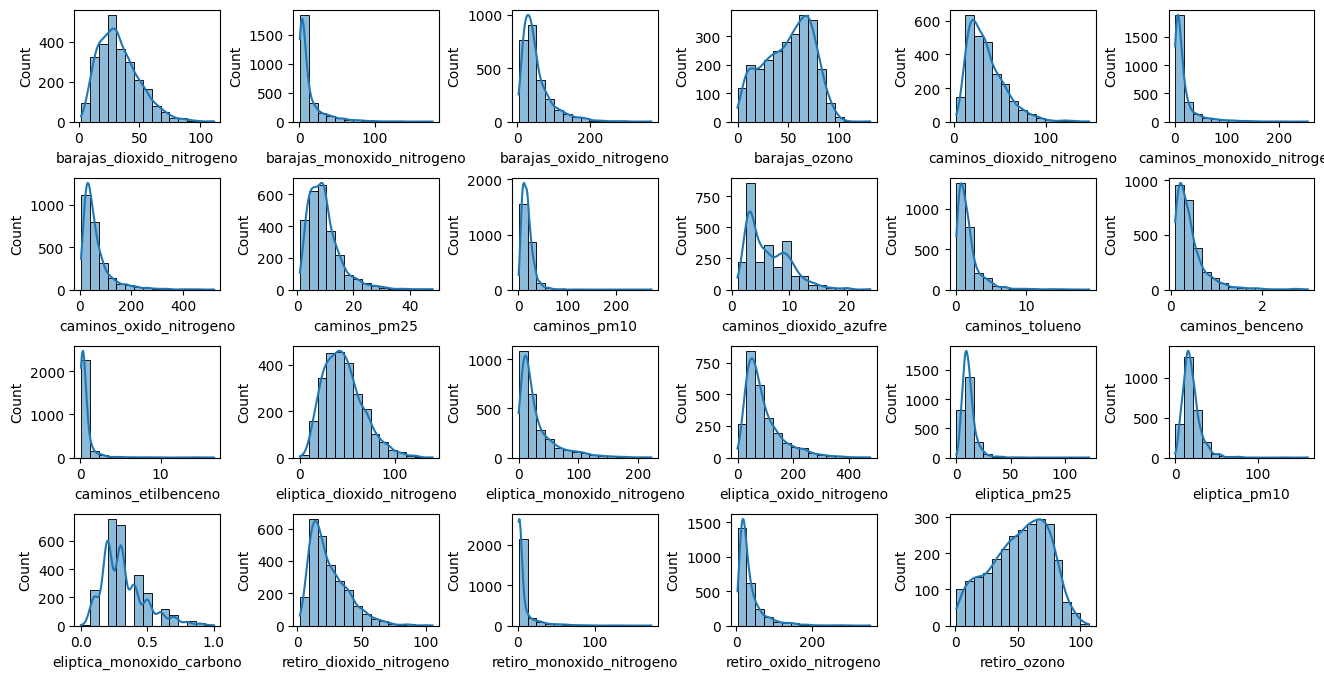

In [ ]:
plt.figure(1 , figsize = (16 , 8))
n = 0
for c in columns_c:
    n += 1
    plt.subplot(4, 6, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.histplot(dm, x=dm[c], bins = 15, kde=True)
plt.show()

***Mejores transformaciones encontradas***

Raíz cúbica: Dióxido de nitrógeno, Ozono, Dióxido de azufre y Monóxido de carbono.

Logaritmo: Monóxido de nitrógeno, Oxidos de nitrógeno, PM2.5, PM10, Tolueno,Benceno y Etilbenceno.

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


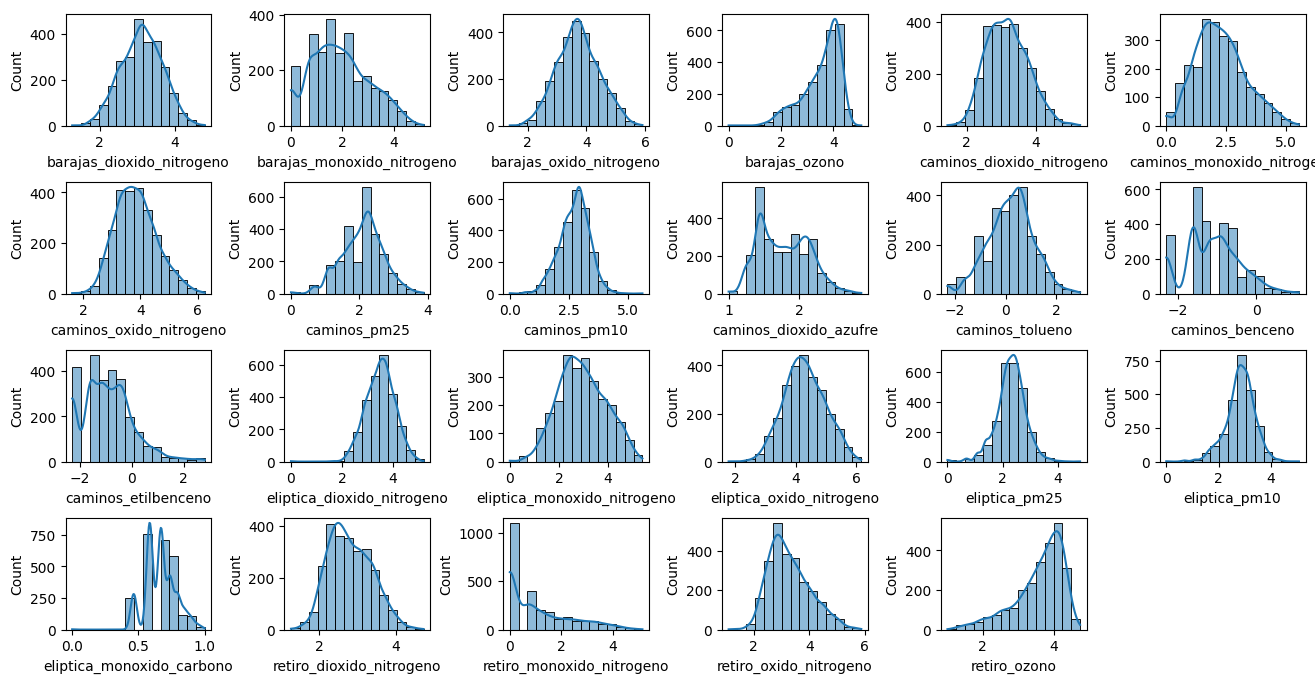

In [ ]:
dm = pd.read_csv('/content/drive/MyDrive/data_CA/master_h_fill_mplus_short.csv')

raizc_v = ['barajas_dioxido_nitrogeno', 'caminos_dioxido_nitrogeno', 'eliptica_dioxido_nitrogeno',
           'retiro_dioxido_nitrogeno', 'barajas_ozono', 'retiro_ozono', 'caminos_dioxido_azufre', 'eliptica_monoxido_carbono']
for v in raizc_v:
  dm[v] = np.cbrt(dm[v])

log_v= [ 'barajas_oxido_nitrogeno', 'caminos_oxido_nitrogeno', 'caminos_pm25', 'caminos_pm10',
        'caminos_tolueno', 'caminos_benceno', 'caminos_etilbenceno', 'eliptica_oxido_nitrogeno',
        'eliptica_pm25', 'eliptica_pm10', 'retiro_oxido_nitrogeno','barajas_monoxido_nitrogeno',
         'caminos_monoxido_nitrogeno', 'eliptica_monoxido_nitrogeno','retiro_monoxido_nitrogeno' ]

for v in log_v:
  dm[v] = np.log(dm[v])

dm_transf = dm

plt.figure(1 , figsize = (16 , 8))
n = 0
for c in columns_c:
    n += 1
    plt.subplot(4, 6, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.histplot(dm_transf, x=dm_transf[c], bins = 15, kde=True)
plt.show()

#***Meteorología***

In [ ]:
dm = pd.read_csv('/content/drive/MyDrive/data_CA/master_h_fill_mplus_short.csv')

columns_m = ['barajas_prec', 'barajas_tmed', 'barajas_hrmed', 'barajas_velmed', 'barajas_dir',
             'barajas_presmed', 'caminos_prec', 'caminos_tmed', 'caminos_hrmed',
             'caminos_velmed', 'caminos_dir', 'caminos_presmed', 'eliptica_prec', 'eliptica_tmed',
             'eliptica_hrmed', 'eliptica_velmed', 'eliptica_dir', 'eliptica_presmed',
             'retiro_prec', 'retiro_tmed', 'retiro_hrmedia', 'retiro_velmed', 'retiro_dir', 'retiro_presmed']
len(columns_m)

24

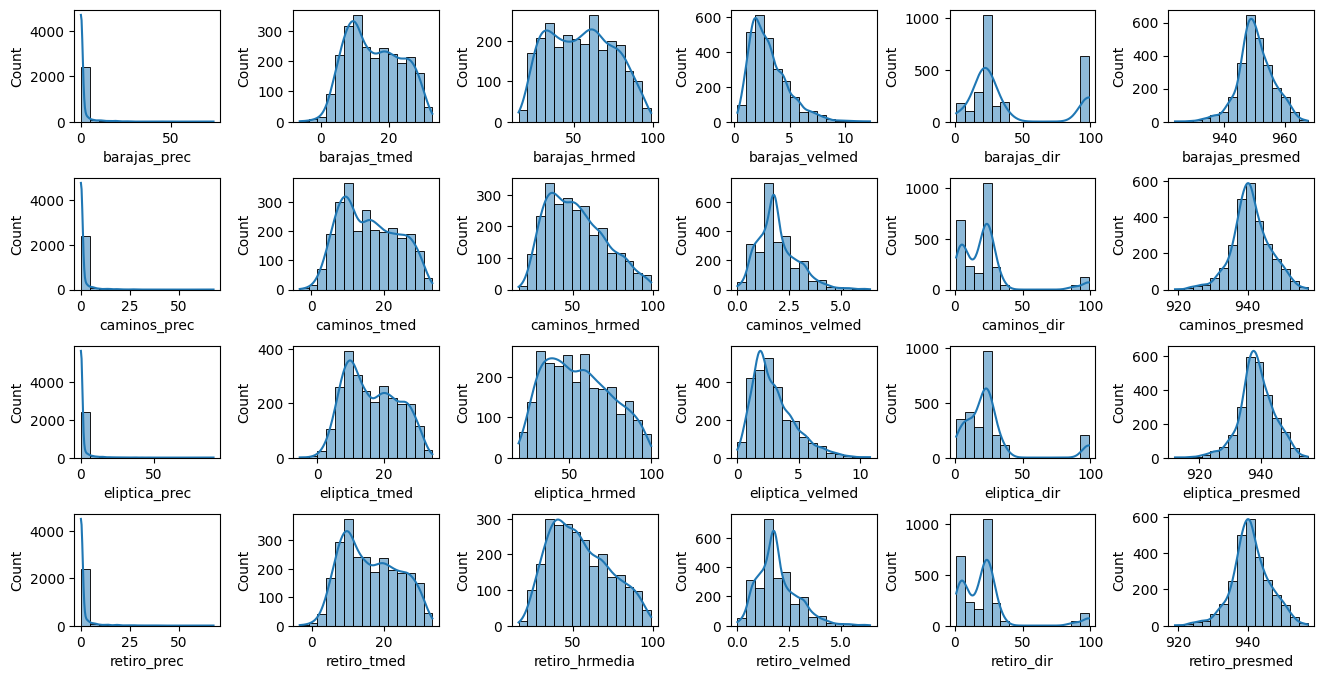

In [ ]:
plt.figure(1 , figsize = (16 , 8))
n = 0
for c in columns_m:
    n += 1
    plt.subplot(4, 6, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.histplot(dm, x=dm[c], bins = 15, kde=True)
plt.show()

***Mejores transformaciones encontradas***

Raíz cúbica: Velocidad, dirección y presión.

Raíz cuadrada: Temperatura y humedad.


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


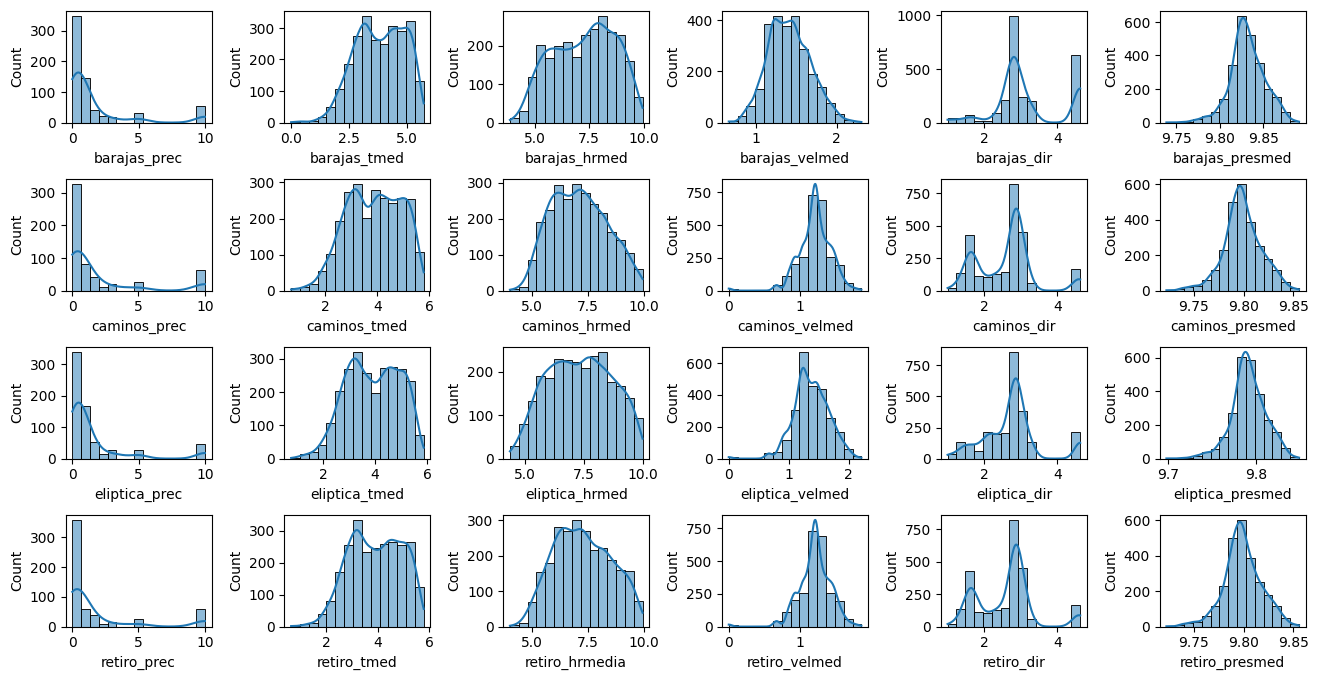

In [ ]:
dm = pd.read_csv('/content/drive/MyDrive/data_CA/master_h_fill_mplus_short.csv')

raizc_v = ['barajas_velmed', 'barajas_presmed',  'caminos_velmed', 'caminos_presmed',
           'eliptica_velmed', 'eliptica_presmed', 'retiro_velmed', 'retiro_presmed',
           'barajas_dir', 'caminos_dir', 'eliptica_dir', 'retiro_dir']

for v in raizc_v:
  dm[v] = np.cbrt(dm[v])

sqrt_v= ['barajas_tmed', 'barajas_hrmed', 'caminos_tmed', 'caminos_hrmed',
        'eliptica_tmed', 'eliptica_hrmed', 'retiro_tmed', 'retiro_hrmedia']

for v in sqrt_v:
  dm[v] = np.sqrt(dm[v])

div_v =['barajas_prec', 'caminos_prec', 'eliptica_prec', 'retiro_prec']

for v in div_v:
  dm[v] = 1/dm[v]

dm_transf = dm

plt.figure(1 , figsize = (16 , 8))
n = 0
for c in columns_m:
    n += 1
    plt.subplot(4, 6, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.histplot(dm_transf, x=dm_transf[c], bins = 15, kde=True)
plt.show()

#***Tráfico***

In [ ]:
columns_t = ['barajas_intensidad', 'barajas_ocupacion', 'barajas_carga',
             'caminos_intensidad', 'caminos_ocupacion', 'caminos_carga',
             'eliptica_intensidad', 'eliptica_ocupacion', 'eliptica_carga',
             'retiro_intensidad', 'retiro_ocupacion', 'retiro_carga']
len(columns_t)

12

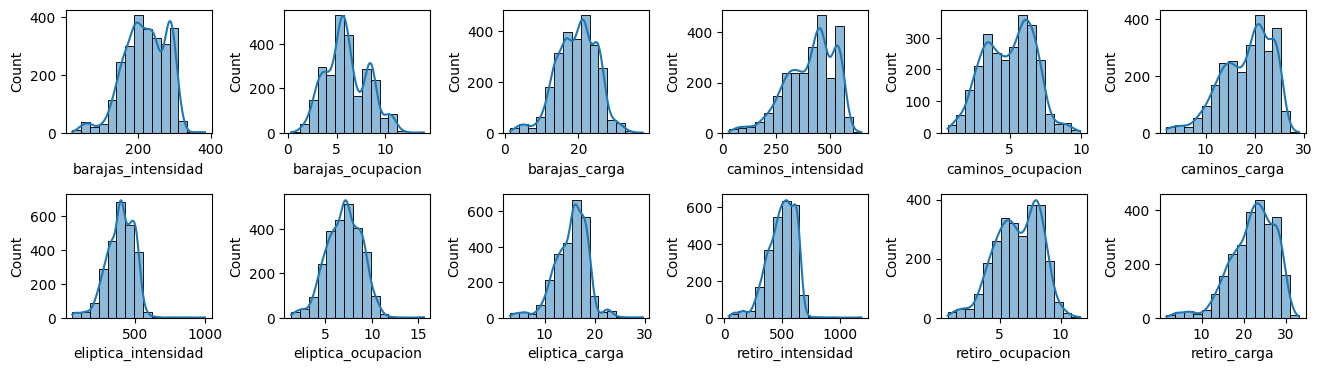

In [ ]:
dm = pd.read_csv('/content/drive/MyDrive/data_CA/master_h_fill_mplus_short.csv')
plt.figure(1 , figsize = (16 , 4))
n = 0
for c in columns_t:
    n += 1
    plt.subplot(2, 6, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.histplot(dm, x=dm[c], bins = 15, kde=True)
plt.show()

Se emplearán los datos sin transformar.

In [ ]:
dm = pd.read_csv('/content/drive/MyDrive/data_CA/master_h_fill_mplus_short.csv')

raizc_v = ['barajas_dioxido_nitrogeno', 'caminos_dioxido_nitrogeno', 'eliptica_dioxido_nitrogeno',
           'retiro_dioxido_nitrogeno', 'barajas_ozono', 'retiro_ozono', 'caminos_dioxido_azufre',
           'eliptica_monoxido_carbono','barajas_velmed', 'barajas_presmed', 'caminos_velmed',
           'caminos_presmed', 'eliptica_velmed', 'eliptica_presmed', 'retiro_velmed', 'retiro_presmed',
           'barajas_dir', 'caminos_dir', 'eliptica_dir', 'retiro_dir']

for v in raizc_v:
  dm[v] = np.cbrt(dm[v])

log_v= ['barajas_oxido_nitrogeno', 'caminos_oxido_nitrogeno', 'caminos_pm25', 'caminos_pm10',
        'caminos_tolueno', 'caminos_benceno', 'caminos_etilbenceno', 'eliptica_oxido_nitrogeno',
        'eliptica_pm25', 'eliptica_pm10', 'retiro_oxido_nitrogeno','barajas_monoxido_nitrogeno',
        'caminos_monoxido_nitrogeno', 'eliptica_monoxido_nitrogeno','retiro_monoxido_nitrogeno']

for v in log_v:
  dm[v] = np.log(dm[v])

sqrt_v= ['barajas_tmed', 'barajas_hrmed', 'caminos_tmed', 'caminos_hrmed',
        'eliptica_tmed', 'eliptica_hrmed', 'retiro_tmed', 'retiro_hrmedia']

for v in sqrt_v:
  dm[v] = np.sqrt(dm[v])

dm_transf = dm
dm_transf.to_csv('/content/drive/MyDrive/data_CA/master_h_fill_mplus_short_transform.csv', index=False)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
